## Introduction

![EDA_illustration](./doc/images/placeholder.png)

<div style="background-color: rgb(40, 40, 40); padding: 20px">
Data science is an interdisciplinary field that involves the use of statistical, computational, and machine learning techniques to extract insights and knowledge from data.
</div>

<div style="background-color: rgb(40, 40, 40); padding: 20px">
Data Engineers are professionals who specialize in handling and managing large volumes of data. They write computer programs and use various tools to build data pipelines that transform raw data into a more usable format for different teams within a company, including Business Intelligence Analysts, Data Analysts, Data Scientists, Machine Learning Engineers, and Database Administrators.
</div>

The goal of this project was to gather job postings for `"Data Engineer"` positions from www.glassdoor.com and analyze them to identify average salaries, working conditions, benefits, required skills, and trends. The data was collected between `11-04-2023` and `15-04-2023` from `32 countries`, including the USA and Canada, Europe, South East Asia, and Oceania.<br><br>The scraper utilized the Selenium package to provide the necessary client interaction to extract posting information, with a maximum cap of `900 jobs per selected country`. Due to Glassdoor's peculiar behavior, the number of job postings was often reduced from `900` to `300` or less after eliminating duplicates. Sometimes, Glassdoor listed irrelevant positions like "Android Mobile Developer" or "Outside Sales Representative" for a "Data Engineer" query, causing the number to drop further.<br><br>
The final number of job entries is `3117` positions.<br>That spans `32` selected countries in North America, Europe, South East Asia, and Oceania.<br><br>
It is important to note that the data used in this analysis was obtained by separately scraping job postings for each country, which means that direct comparisons between countries may not be appropriate and the data should be interpreted with caution. Additionally, please keep in mind that there is a cap of 900 in the salary data for every queried country, which may impact the accuracy of the comparison.
<br><br>This project was inspired by [Ken Jee's work](https://github.com/PlayingNumbers), and as the author would like to extend special thanks to him.

## Table of content

# todo

## About the data

The whole dataset was scraped from [glassdoor.com](www.glassdoor.com)

<img src="doc\images\Glassdoor-Logo.png"  width="60%" height="60%">

<div style="background-color: rgb(40, 40, 40); padding: 20px">
"Our site offers millions of the latest job listings, combined with a growing database of company reviews, CEO approval ratings, salary reports, interview reviews and questions, benefits reviews, office photos, and more. Unlike other job sites, all of the information on our site is shared by those who know a company best - the employees."
</div>

### Before Cleaning

In the RAW format, each job contains the following information:
- Company_name
- Rating
- Location
- Job_title
- Description
- Job_age
- Easy_apply
- Salary
- Employees
- Type_of_ownership
- Sector
- Founded
- Industry
- Revenue_USD
- Friend_recommend
- CEO_approval
- Career_opportunities
- Comp_&_benefits
- Culture_&_values
- Senior_management
- Work/Life_balance
- Pros
- Cons
- Benefits_rating
- Benefits_reviews

### After Cleaning

After cleaning and enriching data we have the following columns in multi-index:

**Job_details**

| columns | description (examples) | data type |
|---|---|---|
| Title                                             | Data Engineer, BI Engineer...                                     | string |
| Description                                       | The description provided by company                               | string |
| Seniority                                         | Junior, Mid, Senior, Management                                   | string |
| City                                              | Los Angeles, e.g.                                                 | string |
| State                                             | California, e.g.                                                  | string |
| Country                                           | United States, e.g.                                               | string |
| Region                                            | North America, e.g. (and Europe, South East Asia, Oceania)        | string |
| Job_age                                           | 1 to 31 (max value, in that case it means "31+ days")                  |  int   |
| Easy_apply                                        | Y/N (applying via glassdoor)                                      |  bool  |

**Salary**<br>
All float values are in USD
| columns | description (examples) | data type |
|---|---|---|
| Min                                               | Minimal buck in local currency for the position in the company    | float  |
| Max                                               | Maximal buck in local currency for the position in the company    | float  |
| Avg                                               | The inner value between the minimal and the maximal               | float  |
| Currency (ISO 3 letters standard)                 | The currency in which the salary is paid:<br>USD, EUR, CAD, DKK, HDK, NZD, NOK, PLN, RON, SGD, SEK, CHF, GBP   | string |
| Employer_provided                                 | Y/N (Does the employer provide pay scale ranges)                  |  bool  |
| Is_hourly                                         | Y/N/NaN (Paid by number of worked hours, or monthly)                  |  bool  |
| Specified                                         | Y/N (Is or is not salary mentioned in the posting, includes also undefined salaries)                 |  bool  |

**Company_info**
| columns | description (examples) | data type |
|---|---|---|
| Name                                          | The Great company Co., Ausgezeichnete Gmbh...                             | string|
| Rating                                        | 0.0-5.0, The rating of the company                                        |  int  |
| Employees                                     | 1 to 50, 51 to 200, 501 to 1000, 1001 to 5000, 5001 to 10000, 10000+      | string|
| Type_of_ownership                             | Company - Private, Company - Public, Subs...                              | string|
| Sector                                        | Information Technology, Human Resources & Staffing...                     | string|
| Industry                                      | Information Technology Support Services, HR Consulting...                 | string|
| Company_age                                   | 2, 12, 333... (The numbers of years in 2023)                              |  int  |
| Revenue_USD                                   | Less than $1 million, $1 to $5 million                                    | string|
| Friend_recommend                              | 0.00 to 1.00 (0% to 100%)                                                 | float |
| CEO_approval                                  | 0.00 to 1.00 (0% to 100%)                                                 | float |
| Career_opportunities                          | 0.0 to 5.0                                                                | float |
| Comp_&_benefits                               | 0.0 to 5.0                                                                | float |
| Senior_management                             | 0.0 to 5.0                                                                | float |
| Work/Life_balance                             | 0.0 to 5.0                                                                | float |
| Culture_&_values                              | 0.0 to 5.0                                                                | float |
| Pros                                          | Pay good money, work isn't too difficult" (in 2 reviews), ...             |list[str]|
| Cons                                          | "The pay could be better." (in 7 reviews), "Boss culture" (in 6 reviews)..|list[str]|
| Benefits_rating                               | 0.0 to 5.0                                                                | float |
| Benefits_reviews                              | 0.0 to 5.0                                                                | float |

---

(Below are the requirements extracted from the job description)

**Education**

| columns | description (examples) | data type |
|---|---|---|
| BA                                            | Y/N                                   |  bool  |
| MS                                            | Y/N                                   |  bool  |
| Phd                                           | Y/N                                   |  bool  |
| Certificate                                | Nanodegree, DataCamp, ..., Other      | string |

**Version_control**

| columns | description (examples) | data type |
|---|---|---|
| Git                                           | Github, GitLab, ..., Git (subset of any previous) | string |

**Cloud_platforms (Top 10)**

| columns | description (examples) | data type |
|---|---|---|
| AWS                                           | Y/N   |  bool  |
| Microsoft_Azure                               | Y/N   |  bool  |
| GPC                                           | Y/N   |  bool  |
| Alibaba                                       | Y/N   |  bool  |
| Oracle                                        | Y/N   |  bool  |
| IBM                                           | Y/N   |  bool  |
| Tencent                                       | Y/N   |  bool  |
| OVHcloud                                      | Y/N   |  bool  |
| DigitalOcean                                  | Y/N   |  bool  |
| Lincode                                       | Y/N   |  bool  |

**RDBMS (Relational Database Management System)**

| columns | description (examples) | data type |
|---|---|---|
| PostgreSQL                                    | Y/N |  bool  |
| Microsoft_SQL_Server                          | Y/N |  bool  |
| IBM_Db2                                       | Y/N |  bool  |
| MySQL                                         | Y/N |  bool  |
| Oracle_PL_SQL                                 | Y/N |  bool  |

**NOSQL (not only SQL)**

| columns | description (examples) | data type |
|---|---|---|
| MongoDB                                       | Y/N |  bool  |
| Cassandra                                     | Y/N |  bool  |
| Amazon_DynamoDB                               | Y/N |  bool  | 
| Neo4j                                         | Y/N |  bool  |

**Search_&_Analytics**

| columns | description (examples) | data type |
|---|---|---|
| Apache_Solr                                   | Y/N |  bool  |
| Amazon_Redshift                               | Y/N |  bool  |
| Google_BigQuery                               | Y/N |  bool  |
| Snowflake                                     | Y/N |  bool  |
| Oracle_Exadata                                | Y/N |  bool  |
| SAP_HANA                                      | Y/N |  bool  |
| Teradata                                      | Y/N |  bool  |

**Data_integration_and_processing**

| columns | description (examples) | data type |
|---|---|---|
| Informatica_PowerCenter                       | Y/N |  bool  |
| Databricks                                    | Y/N |  bool  |
| Presto                                        | Y/N |  bool  |

**Stream_processing_tools**

| columns | description (examples) | data type |
|---|---|---|
| Apache_Kafka                                  | Y/N |  bool  |     
| Apache_Flink                                  | Y/N |  bool  |
| Dataflow                                      | Y/N |  bool  |

**Workflow_orchestration_tools**

| columns | description (examples) | data type |
|---|---|---|
| Apache_Airflow                                | Y/N |  bool  |
| Luigi                                         | Y/N |  bool  |
| SSIS                                          | Y/N |  bool  |

**Big_Data_processing**

| columns | description (examples) | data type |
|---|---|---|
| Apache_Hadoop                                 | Y/N |  bool  |
| Apache_Hive                                   | Y/N |  bool  |
| Apache_Spark                                  | Y/N |  bool  |

**OS**
(Operating system/systems)

| columns | description (examples) | data type |
|---|---|---|
| Linux                                         | Y/N |  bool  |
| Unix                                          | Y/N |  bool  |
| Windows                                       | Y/N |  bool  |
| macOS                                         | Y/N |  bool  |

**Programming_languages**

| columns | description (examples) | data type |
|---|---|---|
| Python                                        | Y/N |  bool  |
| R                                             | Y/N |  bool  |
| Scala                                         | Y/N |  bool  |
| Julia                                         | Y/N |  bool  |
| SQL                                           | Y/N |  bool  |
| Java                                          | Y/N |  bool  |
| C++                                           | Y/N |  bool  |
| Go                                            | Y/N |  bool  |
| Bash                                          | Y/N |  bool  |
| PowerShell                                    | Y/N |  bool  |
| CLI                                           | Y/N |  bool  |

**Business_Intelligence_Tools**

| columns | description (examples) | data type |
|---|---|---|
| Tableau                                       | Y/N |  bool  |
| Power_BI                                      | Y/N |  bool  |
| Google_Analytics                              | Y/N |  bool  |
| QlikView                                      | Y/N |  bool  |
| Oracle_BI_server                              | Y/N |  bool  |
| SAS_Analytics                                 | Y/N |  bool  |
| Lumira                                        | Y/N |  bool  |
| Cognos_Impromptu                              | Y/N |  bool  |
| MicroStrategy                                 | Y/N |  bool  |
| InsightSquared                                | Y/N |  bool  |
| Sisense                                       | Y/N |  bool  |
| Dundas_BI                                     | Y/N |  bool  |
| Domo                                          | Y/N |  bool  |
| Looker                                        | Y/N |  bool  |
| Excel                                         | Y/N |  bool  |

### Basic Exploration

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = Path("data\clean\Data_Engineer\Data_Engineer_15-04-2023.csv")
data = pd.read_csv(file_path, index_col=0, header=[0, 1])

In [4]:
print(f"Summary Of The Numerical Data:")
data.describe()

Summary Of The Numerical Data:


Job_details         Salary                               Company_info  \
          Job_age            Min            Max            Avg       Rating   
count  3094.00000     765.000000     769.000000     765.000000  2597.000000   
mean     22.51616   81633.309804  103310.979194   92612.167974     3.971506   
std      10.77028   39400.680794   42295.539610   38824.046315     0.560854   
min       1.00000   20240.000000   20240.000000   20240.000000     1.000000   
25%      13.00000   53064.000000   72372.000000   62511.000000     3.700000   
50%      31.00000   72513.000000   95090.000000   83764.500000     4.000000   
75%      31.00000  105763.000000  131000.000000  119500.000000     4.300000   
max      31.00000  325704.000000  271429.000000  227541.000000     5.000000   

                                                                       \
       Company_age Friend_recommend CEO_approval Career_opportunities   
count  1721.000000      2497.000000  1692.000000          2540.000000   
mean     47.753051         0.775751     0.841070             3.715157   
std      52.649820         0.158424     0.148993             0.593548   
min       2.000000         0.090000     0.130000             1.000000   
25%      15.000000         0.690000     0.780000             3.400000   
50%      28.000000         0.800000     0.880000             3.700000   
75%      56.000000         0.890000     0.940000             4.000000   
max     333.000000         1.000000     1.000000             5.000000   

                                                                            \
      Comp_&_benefits Senior_management Work/Life_balance Culture_&_values   
count     2537.000000       2536.000000       2536.000000      2535.000000   
mean         3.654158          3.621491          3.807374         3.843787   
std          0.627441          0.664857          0.595417         0.632586   
min          1.000000          1.000000          1.000000         1.000000   
25%          3.300000          3.200000          3.400000         3.500000   
50%          3.700000          3.600000          3.800000         3.900000   
75%          4.000000          4.000000          4.200000         4.200000   
max          5.000000          5.000000          5.000000         5.000000   

                       
      Benefits_rating  
count     1174.000000  
mean         3.956899  
std          0.647850  
min          1.000000  
25%          3.700000  
50%          4.000000  
75%          4.300000  
max          5.000000

In [5]:
from typing import Literal

def show_percentages(df: pd.DataFrame, type: Literal["bool", "string"] = "bool"):

    def to_percent(percentages: pd.DataFrame):
        return percentages.apply(lambda x: f'{x:.2%}')

    total_jobs = len(df)
    print(f"Number of jobs: {total_jobs}\n")

    result_df = None

    if type == "bool":

        summed = df.sum()
        percentages = df.mean()
        percentages_str = to_percent(percentages)
        result_df = pd.DataFrame({'Percentage of True Values': percentages_str, 'Occurrence': summed})

        num_of_none = (df == False).all(axis=1).sum()
        percentages_none = (num_of_none / total_jobs)
        percentages_none_str = f'{percentages_none:.2%}'

        result_df = result_df.append(pd.DataFrame({'Percentage of True Values': percentages_none_str, 'Occurrence': num_of_none}, index=["None"]))

        result_df.sort_values(ascending=False, by=['Occurrence'], inplace=True)

    elif type == "string":

        summed = df.value_counts()
        percentages = (df.value_counts() / total_jobs)
        percentages.sort_values(ascending=False, inplace=True)
        percentages_str = to_percent(percentages)
        result_df = pd.DataFrame({'Percentage of True Values': percentages_str, 'Occurrence': summed})

        num_of_none = df.isna().sum(skipna=False)
        percentages_none = (num_of_none / total_jobs)
        percentages_none_str = f'{percentages_none:.2%}'

        result_df = result_df.append(pd.DataFrame({'Percentage of True Values': percentages_none_str, 'Occurrence': num_of_none}, index=["None"]))
       

        result_df.sort_values(ascending=False, by=['Occurrence'], inplace=True)

    else:
        raise KeyError(f"Invalid type:\n{type}")      

    print(result_df)


In [6]:
print(f"Summary Of The Job Details:")
data['Job_details'].describe(include=object)

Summary Of The Job Details:


,Title,Description,Seniority,City,State,Country,Region
count,3094,3094,678,2956,274,3094,3094
unique,1904,2947,4,558,41,32,4
top,Data Engineer,Canonical is building a comprehensive automati...,Senior,Tel Aviv-Yafo,England,Israel,Europe
freq,558,12,495,146,72,252,2363


In [7]:
print(f"Seniority Required:")
show_percentages(data['Job_details']['Seniority'], "string")

Seniority Required:
Number of jobs: 3094

           Percentage of True Values  Occurrence
None                          78.09%        2416
Senior                        16.00%         495
Junior                         3.56%         110
Management                     1.52%          47
Mid                            0.84%          26


In [8]:
print(f"Offers Per Country (keep in mind that samples per country are taken independently, and they are after cleaning and dropping duplicates):")
data['Job_details']['Country'].value_counts()

Offers Per Country (keep in mind that samples per country are taken independently, and they are after cleaning and dropping duplicates):


Israel            252
United States     241
France            227
Portugal          189
Germany           164
Sweden            145
Austria           139
Singapore         134
Spain             126
Romania           123
United Kingdom    118
Poland            109
Hong Kong         105
Denmark            91
Hungary            86
Italy              80
Ireland            75
Czech Republic     68
Australia          67
Belgium            64
Switzerland        60
Finland            58
Greece             56
New Zealand        52
South Korea        46
Japan              42
Netherlands        40
Taiwan             40
Luxembourg         40
Norway             31
Turkey             22
Canada              4
Name: Country, dtype: int64

In [9]:
print(f"Offers Per City:")
data['Job_details']['City'].value_counts()[:10]

Offers Per City:


Tel Aviv-Yafo    146
Singapore        128
Portugal         119
Remote           100
Hong Kong         88
Bucharest         87
Paris             85
Israel            82
Stockholm         80
Vienna            71
Name: City, dtype: int64

In [10]:
print(f"Offers Remote:")

job_total = len(data)
num_remote = (data['Job_details']['City'] == 'Remote').sum()
num_nan_locations = data['Job_details']['City'].isna().sum()
num_onsite = job_total - (num_remote + num_nan_locations)

print(
    f"""
    Remote offers:
    {num_remote}
    {(num_remote / job_total):.2%}

    Offers Onsite:
    {num_onsite}
    {(num_onsite / job_total):.2%}

    Unknown precise location:
    {num_nan_locations}
    {(num_nan_locations / job_total):.2%}
    """
)

del num_remote, job_total, num_nan_locations, num_onsite

Offers Remote:

    Remote offers:
    100
    3.23%

    Offers Onsite:
    2856
    92.31%

    Unknown precise location:
    138
    4.46%
    


In [11]:
print(f"Jobs ages in days (31 is 30+ days):\n")
show_percentages(data['Job_details']['Job_age'], "string")

Jobs ages in days (31 is 30+ days):

Number of jobs: 3094

     Percentage of True Values  Occurrence
31                      53.72%        1662
1                        5.59%         173
13                       4.04%         125
14                       2.46%          76
7                        2.42%          75
8                        2.33%          72
6                        2.29%          71
11                       1.81%          56
5                        1.81%          56
15                       1.58%          49
19                       1.55%          48
20                       1.52%          47
12                       1.49%          46
28                       1.45%          45
21                       1.45%          45
2                        1.42%          44
22                       1.33%          41
26                       1.26%          39
18                       1.23%          38
10                       1.10%          34
27                       1.07%        

In [12]:
def show_distribution_ratings(data: pd.DataFrame, title: str):

    with plt.style.context('seaborn'):
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.set_title(f'Distribution of {title}', size=16)
        sns.distplot(data, ax=ax, color="purple")
        plt.show()
    

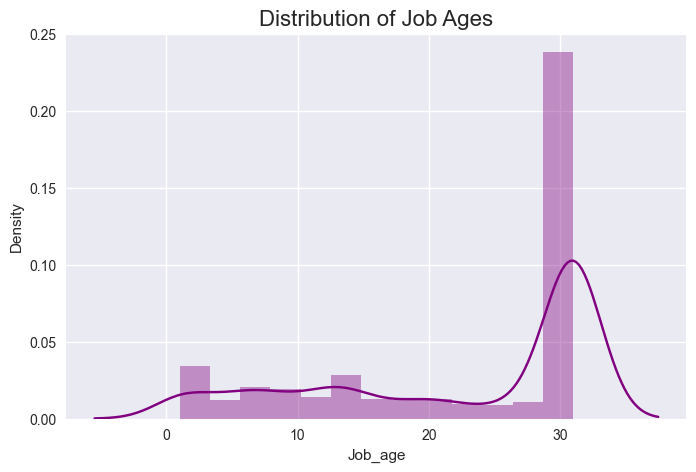

In [13]:
show_distribution_ratings(data['Job_details']['Job_age'], "Job Ages")

In [14]:
print(f"Apply via Glassdoor:")

jobs_total = len(data)
easy_apply = {
    "Y": data['Job_details']['Easy_apply'].sum(),
    "N": (~data['Job_details']['Easy_apply']).sum(),
}

print(
    f"""
    Easy apply:
    Y: {easy_apply['Y']}   {(easy_apply['Y'] / jobs_total):.2%}
    N: {easy_apply['N']}  {(easy_apply['N'] / jobs_total):.2%}
    """
)

del jobs_total, easy_apply

Apply via Glassdoor:

    Easy apply:
    Y: 713   23.04%
    N: 2381  76.96%
    


In [15]:
print(f"Salaries Currencies:")

data['Salary'].describe(include=object)

Salaries Currencies:


,Currency,Is_hourly
count,776,776
unique,15,2
top,EUR,False
freq,235,603


In [16]:
print(f"Salaries Specified:")
data['Salary']['Specified'].value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

Salaries Specified:


False    74.92%
True     25.08%
Name: Specified, dtype: object

In [17]:
print(f"Salaries Provided by Employer:")

data['Salary']['Employer_provided'].value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

Salaries Provided by Employer:


False    83.68%
True     16.32%
Name: Employer_provided, dtype: object

In [18]:
print(f"Salaries Paid Hourly:")

data['Salary']['Is_hourly'].value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

Salaries Paid Hourly:


NaN      74.92%
False    19.49%
True      5.59%
Name: Is_hourly, dtype: object

In [19]:
print(f"Summary of Company Info Data:")

data['Company_info'].describe(include=object)

Summary of Company Info Data:


,Name,Employees,Type_of_ownership,Sector,Industry,Revenue_USD,Pros,Cons,Benefits_reviews
count,3094,2493,2637,2094,2094,1278,2404,2404,785
unique,1941,7,11,24,80,9,1420,1194,351
top,Gotfriends,10000+,Company - Private,Information Technology,Information Technology Support Services,$10+ billion,"['""Good people and good managers."" (in 3 revie...",['No Cons have been reported by the Glassdoor ...,"['401K Plan (573 comments)\n""6% Match best in ..."
freq,100,679,1540,785,346,374,100,481,32


In [20]:
print(f"Top 10 employees:")
data['Company_info']['Name'].value_counts()[:10]

Top 10 employees:


Gotfriends                           100
SQlink                                84
Accenture                             32
Canonical - Jobs                      25
Nigel Frank International Limited     19
EPAM Systems                          18
EY                                    16
Vodafone                              15
ROCKEN                                15
ING                                   15
Name: Name, dtype: int64

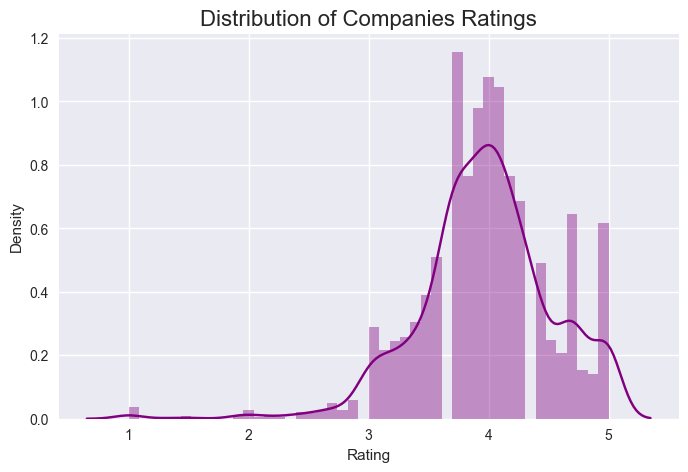

In [21]:
show_distribution_ratings(data['Company_info']['Rating'], "Companies Ratings")

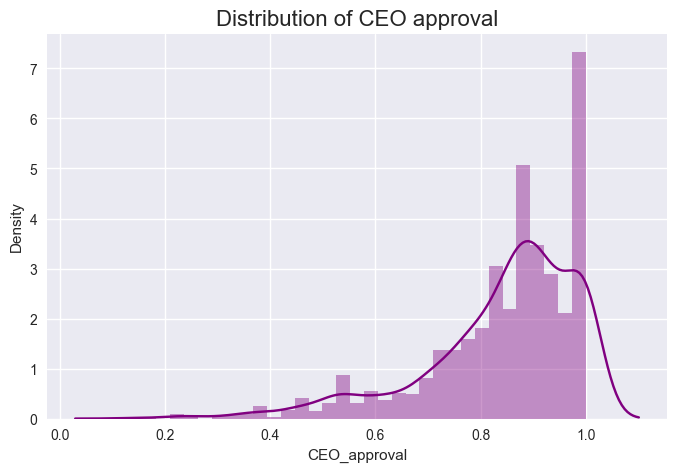

In [22]:
show_distribution_ratings(data['Company_info']['CEO_approval'], "CEO approval")

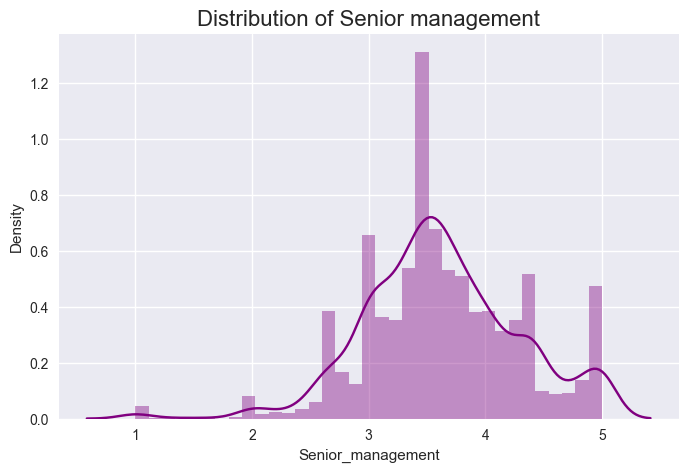

In [23]:
show_distribution_ratings(data['Company_info']['Senior_management'], "Senior management")

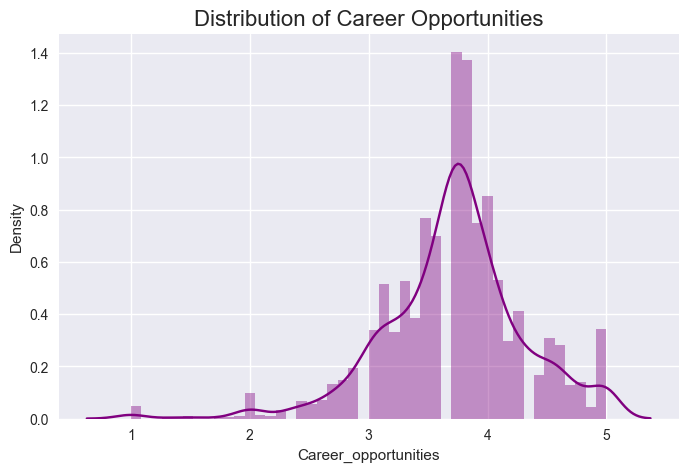

In [24]:
show_distribution_ratings(data['Company_info']['Career_opportunities'], "Career Opportunities")

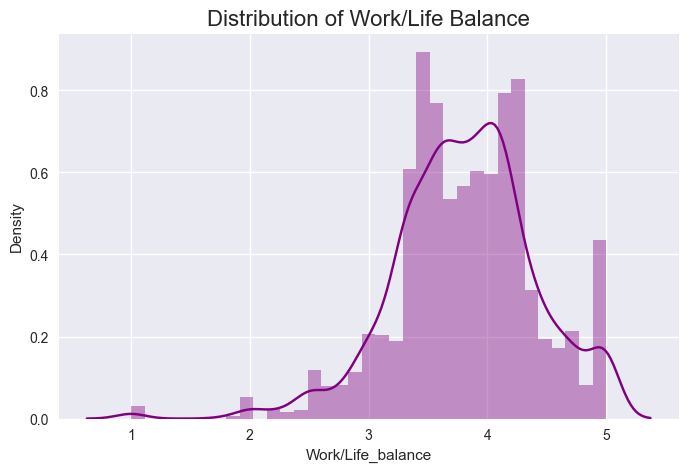

In [25]:
show_distribution_ratings(data['Company_info']['Work/Life_balance'], "Work/Life Balance")

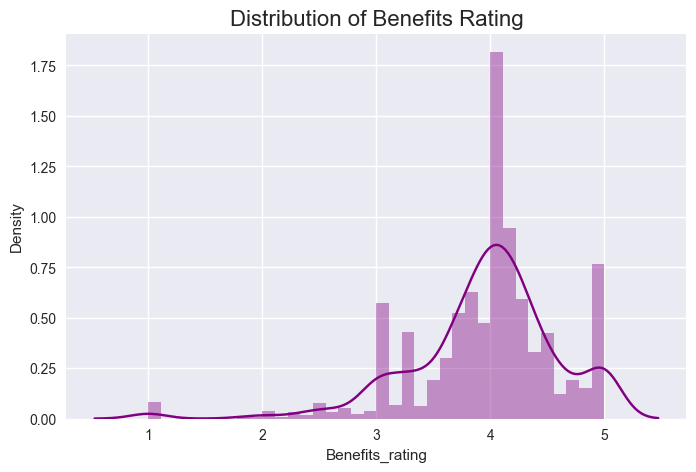

In [26]:
show_distribution_ratings(data['Company_info']['Benefits_rating'], "Benefits Rating")

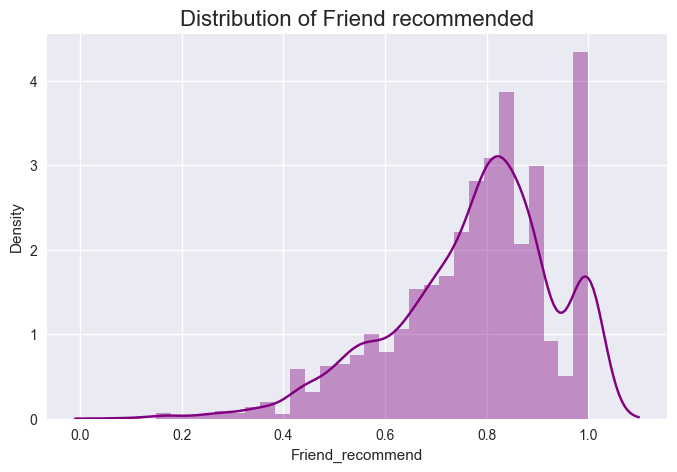

In [27]:
show_distribution_ratings(data['Company_info']['Friend_recommend'], "Friend recommended")

In [28]:
print(f"Companies Sizes (number of employees):")

data['Company_info']['Employees'].value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

Companies Sizes (number of employees):


10000+           21.95%
NaN              19.42%
51 to 200        13.93%
1001 to 5000     13.15%
1 to 50          12.38%
201 to 500        7.98%
501 to 1000       7.14%
5001 to 10000     4.04%
Name: Employees, dtype: object

In [29]:
def value_counts_percent(df: pd.DataFrame):
    return df.value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

In [30]:
print(f"Companies Sizes (Revenue):")

value_counts_percent(data['Company_info']['Revenue_USD'])

Companies Sizes (Revenue):


NaN                           58.69%
$10+ billion                  12.09%
$1 to $5 billion               6.76%
$100 to $500 million           5.49%
$25 to $100 million            5.27%
$5 to $25 million              3.62%
$5 to $10 billion              3.36%
$500 million to $1 billion     2.00%
$1 to $5 million               1.81%
Less than $1 million           0.90%
Name: Revenue_USD, dtype: object

In [31]:
print(f"Companies Ownership Type:")

value_counts_percent(data['Company_info']['Type_of_ownership'])

Companies Ownership Type:


Company - Private                 49.77%
Company - Public                  28.73%
NaN                               14.77%
Subsidiary or Business Segment     2.71%
Self-employed                      0.97%
Government                         0.97%
Nonprofit Organization             0.68%
Private Practice / Firm            0.58%
Contract                           0.42%
College / University               0.32%
Franchise                          0.03%
Hospital                           0.03%
Name: Type_of_ownership, dtype: object

In [32]:
print(f"Companies Sector:")

value_counts_percent(data['Company_info']['Sector'])

Companies Sector:


NaN                                            32.32%
Information Technology                         25.37%
Human Resources & Staffing                      9.99%
Financial Services                              6.30%
Management & Consulting                         5.85%
Manufacturing                                   4.40%
Media & Communication                           2.33%
Energy, Mining & Utilities                      1.68%
Telecommunications                              1.58%
Retail & Wholesale                              1.52%
Transportation & Logistics                      1.45%
Pharmaceutical & Biotechnology                  1.16%
Insurance                                       1.16%
Construction, Repair & Maintenance Services     0.84%
Healthcare                                      0.78%
Government & Public Administration              0.71%
Education                                       0.68%
Aerospace & Defense                             0.68%
Real Estate                 

In [33]:
print(f"Companies Industry:")

value_counts_percent(data['Company_info']['Industry'])

Companies Industry:


NaN                                        32.32%
Information Technology Support Services    11.18%
HR Consulting                               6.11%
Computer Hardware Development               5.79%
Enterprise Software & Network Solutions     4.46%
                                            ...  
Membership Organizations                    0.03%
Music & Sound Production                    0.03%
Pharmaceutical                              0.03%
Law Firms                                   0.03%
Film Production                             0.03%
Name: Industry, Length: 81, dtype: object

In [34]:
del value_counts_percent

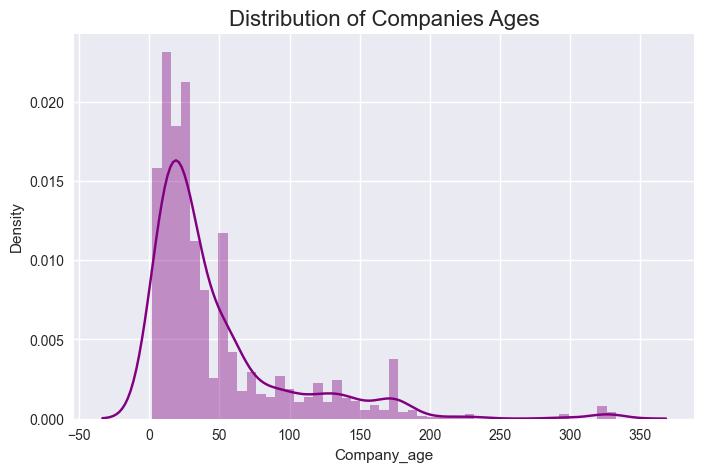

In [35]:
show_distribution_ratings(data['Company_info']['Company_age'], "Companies Ages")

In [36]:
del show_distribution_ratings

In [37]:
print(f"Education Needed:\n")

show_percentages(data['Education'][['BA', 'MS', 'Phd']])

Education Needed:

Number of jobs: 3094

     Percentage of True Values  Occurrence
None                    93.15%        2882
MS                       4.07%         126
BA                       3.59%         111
Phd                      0.32%          10


In [38]:
print(f"Certificates Needed:\n")

show_percentages(data['Education']['Certificate'], "string")

Certificates Needed:

Number of jobs: 3094

         Percentage of True Values  Occurrence
None                        99.55%        3080
Other                        0.42%          13
DataCamp                     0.03%           1


In [39]:
print(f"Version Control:\n")

show_percentages(data['Version_control']['Git'], "string")

Version Control:

Number of jobs: 3094

          Percentage of True Values  Occurrence
None                         97.90%        3029
Git                           1.20%          37
GitLab                        0.55%          17
Github                        0.29%           9
Bitbucket                     0.03%           1
Launchpad                     0.03%           1


In [40]:
print(f"Version Cloud Platforms:\n")

show_percentages(data['Cloud_platforms'])

Version Cloud Platforms:

Number of jobs: 3094

                Percentage of True Values  Occurrence
None                               81.61%        2525
Microsoft_Azure                     9.95%         308
AWS                                 8.73%         270
GPC                                 3.68%         114
Oracle                              0.13%           4
IBM                                 0.10%           3
Alibaba                             0.00%           0
Tencent                             0.00%           0
OVHcloud                            0.00%           0
DigitalOcean                        0.00%           0
Lincode                             0.00%           0


In [41]:
print(f"Relational Database Management System:\n")

show_percentages(data['RDBMS'])

Relational Database Management System:

Number of jobs: 3094

                     Percentage of True Values  Occurrence
None                                    96.22%        2977
PostgreSQL                               1.62%          50
MySQL                                    1.62%          50
Microsoft_SQL_Server                     1.36%          42
Oracle_PL_SQL                            0.36%          11
IBM_Db2                                  0.10%           3


In [42]:
print(f"Any Non-Relational Database:\n")

show_percentages(data['NOSQL'])

Any Non-Relational Database:

Number of jobs: 3094

                Percentage of True Values  Occurrence
None                               98.00%        3032
MongoDB                             1.42%          44
Cassandra                           0.55%          17
Amazon_DynamoDB                     0.29%           9
Neo4j                               0.06%           2


In [43]:
print(f"Search & Analytics:\n")

show_percentages(data['Search_&_Analytics'])

Search & Analytics:

Number of jobs: 3094

                Percentage of True Values  Occurrence
None                               94.80%        2933
Snowflake                           2.65%          82
Google_BigQuery                     1.26%          39
Amazon_Redshift                     1.10%          34
Teradata                            0.68%          21
SAP_HANA                            0.23%           7
Apache_Solr                         0.06%           2
Oracle_Exadata                      0.03%           1


In [44]:
print(f"Data Integration & Processing:\n")

show_percentages(data['Data_integration_and_processing'])

Data Integration & Processing:

Number of jobs: 3094

                        Percentage of True Values  Occurrence
None                                       95.93%        2968
Databricks                                  3.56%         110
Informatica_PowerCenter                     0.32%          10
Presto                                      0.23%           7


In [45]:
print(f"Stream Processing Tools:\n")

show_percentages(data['Stream_processing_tools'])

Stream Processing Tools:

Number of jobs: 3094

             Percentage of True Values  Occurrence
None                            96.25%        2978
Apache_Kafka                     3.43%         106
Apache_Flink                     0.55%          17
Dataflow                         0.19%           6


In [46]:
print(f"Workflow Orchestration Tools:\n")

show_percentages(data['Workflow_orchestration_tools'])

Workflow Orchestration Tools:

Number of jobs: 3094

               Percentage of True Values  Occurrence
None                              97.22%        3008
Apache_Airflow                     2.07%          64
SSIS                               0.68%          21
Luigi                              0.06%           2


In [47]:
print(f"Big Data Processing:\n")

show_percentages(data['Big_Data_processing'])

Big Data Processing:

Number of jobs: 3094

              Percentage of True Values  Occurrence
None                             90.56%        2802
Apache_Spark                      8.73%         270
Apache_Hadoop                     2.59%          80
Apache_Hive                       1.65%          51


In [48]:
print(f"OS:\n")

show_percentages(data['OS'])

OS:

Number of jobs: 3094

        Percentage of True Values  Occurrence
None                       97.32%        3011
Linux                       2.07%          64
Windows                     0.48%          15
Unix                        0.45%          14
macOS                       0.00%           0


In [49]:
print(f"Programming Languages:\n")

show_percentages(data['Programming_languages'])

Programming Languages:

Number of jobs: 3094

           Percentage of True Values  Occurrence
None                          75.27%        2329
SQL                           13.61%         421
Python                        13.54%         419
Java                           4.62%         143
Scala                          3.59%         111
R                              2.81%          87
Bash                           0.32%          10
Go                             0.23%           7
PowerShell                     0.23%           7
CLI                            0.10%           3
Julia                          0.00%           0
C++                            0.00%           0
Rust                           0.00%           0


In [50]:
print(f"Business Intelligence Tools:\n")

show_percentages(data['Business_Intelligence_Tools'])

Business Intelligence Tools:

Number of jobs: 3094

                 Percentage of True Values  Occurrence
None                                96.09%        2973
Power_BI                             2.10%          65
Tableau                              1.20%          37
QlikView                             0.36%          11
Looker                               0.36%          11
Excel                                0.36%          11
Google_Analytics                     0.13%           4
MicroStrategy                        0.13%           4
Oracle_BI_server                     0.00%           0
SAS_Analytics                        0.00%           0
Lumira                               0.00%           0
Cognos_Impromptu                     0.00%           0
InsightSquared                       0.00%           0
Sisense                              0.00%           0
Dundas_BI                            0.00%           0
Domo                                 0.00%           0


## Questions to ask

1. Countries with The Highest Number of Jobs
1. Salaries per Country
1. Age of Job Postings
1. Top 10 Industries with the Highest Number of Jobs
1. Top 10 Industries with the Highest Salaries
1. Companies with Maximum Number of Job Openings
1. Company Ratings
1. Company Size
1. Company Age
1. Company Ownership Type
1. Company Revenue
1. Remote Job
1. Experience Level
1. Skills Required
1. Correlation Map

## 1. Countries with The Highest Number of Jobs

### 1.1 Europe

In [51]:
def show_top_number_of_companies_per_country(data: pd.DataFrame, region: str | list[str]):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        plot_data = data.drop_duplicates(subset=[('Company_info', 'Name')])

        if isinstance(region, list):
            plot_data = plot_data[plot_data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            plot_data = plot_data[plot_data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
            
        return plot_data
    
    def get_countries(region):
        
        if isinstance(region, list):
            title_countries = ", ".join(region)
        else:
            title_countries = region
        return title_countries
    
    def show_plot(plot_data, title_countries):

        plot = plt
        seaborn = sns
    
        plot.subplots(figsize=(20, 8))
    
        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4
        p = seaborn.countplot(x=plot_data, order=plot_data.value_counts().index[:11], saturation=1, linewidth=0, palette=my_palette)

        p.axes.set_title(f"\nData Science Company's Origins: {title_countries}\n",fontsize=25, color="#435672")

        p.axes.set_xlabel("\nOrigin",fontsize=21, color="#435672")
        p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0, color="#435672")
        
        p.axes.set_ylabel("Total\n",fontsize=21, color="#435672")
        p.yaxis.label.set_color("#435672")
        p.tick_params(colors='#435672', which='both')

        for container in p.containers:
            p.bar_label(container,label_type="center",padding=6,size=25,color="#435672",rotation=0,
        bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#f4f8fc", "alpha": 1, "edgecolor": "#435672"})

        for text in p.axes.texts:
            text.set_color("#435672")

        seaborn.despine(left=True, bottom=True)
        plot.show()
    
    plot_data = narrow_data(data, region)

    if region == "North America":
        plot_data = plot_data["Job_details"]['State']
    else:
        plot_data = plot_data["Job_details"]['Country']

    title_countries = get_countries(region)
    
    show_plot(plot_data, title_countries)

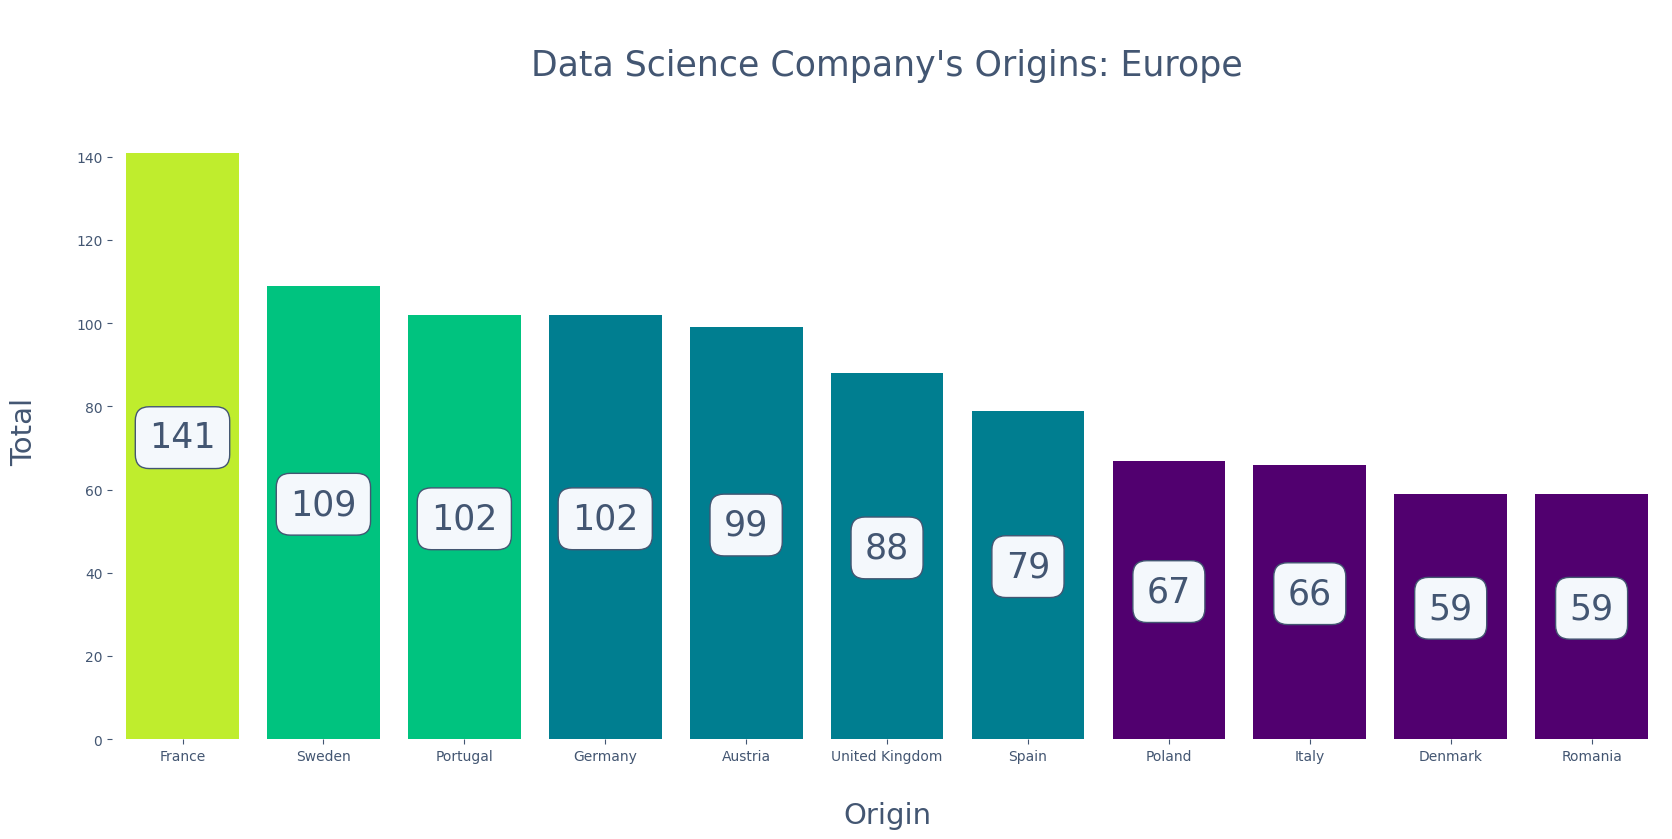

In [52]:
show_top_number_of_companies_per_country(data, 'Europe')

In [53]:
from typing import List, Tuple


def show_number_of_jobs_per_country(
    data: pd.DataFrame,
    region: str,
    lonaxis: List[Tuple[int, int]] = None,
    lataxis: List[Tuple[int, int]] = None,
):
    def narrow_data(data: pd.DataFrame, region: str):
    
        if isinstance(region, list):
            plot_data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            plot_data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
        
        return plot_data
    
    def get_countries(region: str | list[str]):
    
        if isinstance(region, list):
            title_countries = ", ".join(region)
        else:
            title_countries = region

        return title_countries
    
    plot_data = narrow_data(data, region)

    region_details = "Country"
    locationmode = "country names"

    plot_data["Job_details"][region_details] = plot_data["Job_details"][region_details]

    countries = (
        plot_data["Job_details"][region_details]
        .str.strip()
        .value_counts()
        .index.tolist()
    )
    values = (
        plot_data["Job_details"][region_details]
        .str.strip()
        .value_counts()
        .values.tolist()
    )

    data = pd.DataFrame({"Country": countries, "Jobs": values})

    geo = dict(
        showcoastlines=False,
        showcountries=True,
        countrycolor="white",
        showlakes=False,
    )

    if lonaxis and lataxis:
        geo["lonaxis"] = dict(range=lonaxis)
        geo["lataxis"] = dict(range=lataxis)

    elif region:
        geo["scope"] = region.lower()

    else:
        raise TypeError("Argument 'region' is required.")

    fig = px.choropleth(
        data_frame=data,
        locationmode=locationmode,
        locations=region_details,
        height=400,
        width=600,
        color="Jobs",
        hover_data=["Country", "Jobs"],
        title="Sample Choropleth Map",
        labels={"Jobs": "Jobs"},
    )

    title_countries = get_countries(region)

    fig.update_layout(
        dragmode=False,
        margin=dict(l=0, r=0, b=0, t=50),
        geo_resolution=50, # This precision is needed for some microstates
        title_text=f"Number of Jobs per Country in {title_countries}",
        title_font_size=18,
        title_y=0.955,
        geo=geo,
    )

    fig.update_traces(marker=dict(line=dict(color='#435672', width=1)))

    fig.show()

In [54]:
show_number_of_jobs_per_country(data, 'Europe', [-13.0, 50.0], [27, 75])

In [55]:
geo_data = pd.read_csv("data\clean\_Socioeconomic data\geopositioning.csv")

In [56]:
import plotly.graph_objs as go

def show_jobs_density(
        data:pd.DataFrame, 
        region: str, 
        geo_data: pd.DataFrame,
        center_view: dict[str, int] = None,
        mapbox_zoom: float = 2.1
        ):
    
    def check_strings(string_list: list[str] | str, *args: str):

        if isinstance(string_list, str):
            string_list = [string_list]
        for arg in args:
            if arg in string_list:
                return True

        return False
    
    def narrow_data(data: pd.DataFrame, region: str):
    
        if isinstance(region, list):
            plot_data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            plot_data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
        
        return plot_data
    
    def get_countries(region: str | list[str]):
    
        if isinstance(region, list):
            title_countries = ", ".join(region)
        else:
            title_countries = region

        return title_countries
    
    
    def filter_data(data: pd.DataFrame, region: str):

        data = narrow_data(data, region)
        data = data.drop(data[data['Job_details']['City'] == 'Remote'].index)

        if not check_strings(region, "Asia", "Oceania"):
            
            data = data.drop(data[data['Job_details']['City'] == data['Job_details']['Country']].index)
            data = data.dropna(subset=[('Job_details', 'City')])

        data = data['Job_details']
        plot_data = data[['City', 'State', 'Country', 'Region']]


        return plot_data
    
    def set_coords_manually(plot_data: pd.DataFrame, country: str, coords: list[int]):

        mask = plot_data['Country'] == country
        plot_data.loc[mask, ['Latitude', 'Longitude']] = coords

        return plot_data

    
    def update_missing_geo_data(plot_data: pd.DataFrame):

        # Glassdoor didn't scrape any location for those, so as compromise the country location is set

        plot_data = set_coords_manually(plot_data, 'Taiwan',  [23.6978, 120.9605])
        plot_data = set_coords_manually(plot_data, 'Singapore', [1.3521, 103.8198])
        plot_data = set_coords_manually(plot_data, 'South Korea', [35.9078, 127.7669])
        plot_data = set_coords_manually(plot_data, 'Japan', [36.2048, 138.2529])

        return plot_data
    
    
    def add_latitude_longitude(geo_data: pd.DataFrame, plot_data: pd.DataFrame):

        geo_data = geo_data.drop('Location', axis=1)

        # Using join instead of merge method, because it is much less buggy

        plot_data = plot_data.join(
                geo_data.set_index(['City', 'State', 'Country', 'Region']), 
                on=['City', 'State', 'Country', 'Region'], 
                how='left'
            )

        return plot_data
    
    def add_density(plot_data: pd.DataFrame):
        
        plot_data['Density'] = pd.cut(plot_data['Latitude'], bins=100).apply(lambda x: x.right).astype(str) \
            + ',' + pd.cut(plot_data['Longitude'], bins=100).apply(lambda x: x.right).astype(str)
        plot_data['Density'] = plot_data.groupby('Density')['Density'].transform('count')

        return plot_data
    
    def add_missing_data(geo_data: pd.DataFrame, plot_data: pd.DataFrame, region: str):

        plot_data = add_latitude_longitude(geo_data, plot_data)

        if check_strings(region, "Asia", "Oceania"):
            plot_data = update_missing_geo_data(plot_data)

        plot_data = add_density(plot_data)
        
        return plot_data
    
    def create_heatmap_data(plot_data: pd.DataFrame, max_value: int) -> str:

        def get_hovertemplate(row: pd.core.series.Series):

            info = {
                'jobs': f"Jobs:      {row['Density']}<br>" if row['Density'] is not np.nan else "",
                'country': f"Country:   {row['Country']}<br>" if row['Country']  is not np.nan else "",
                'subregion': f"Subregion: {row['State']}<br>" if row['State']  is not np.nan else "",
                'city': f"City:      {row['City']}<br>" if row['City']  is not np.nan else "",
                'no_extra': '<extra></extra>'
            }

            hover = ""

            for label in info.values():
                if label:
                    hover += label

            return hover



        plot_data['hovertemplate'] = plot_data.apply(
                lambda row: get_hovertemplate(row), 
                axis=1
            )


        return go.Densitymapbox(
            lat = plot_data['Latitude'],
            lon = plot_data['Longitude'],
            radius = 30,
            colorscale = 'Viridis',
            zmin = 0,
            zmax = max_value,
            customdata = plot_data[['Density', 'Country', 'State', 'City']],
            hovertemplate = plot_data['hovertemplate'],
            colorbar=dict(
                outlinewidth=0
            )
        )
    
    def create_choropleth_data(plot_data: pd.DataFrame, max_value: int):

        return go.Choropleth(
            locations = plot_data['City'],
            locationmode = 'country names',
            colorscale = 'Viridis',
            zmin = 0,
            zmax = max_value,
            text = plot_data['City'] + ', ' + plot_data['Country']
        )
    
    def update_fig(plot_data: pd.DataFrame, fig: go.Figure, center_view: dict, mapbox_zoom: float = 2.1):

        title_countries = get_countries(region)

        if not center_view:
            center_view = {
                'lat': plot_data['Latitude'].mean(),
                'lon': plot_data['Longitude'].mean(),
            }

        fig.update_layout(
            title_text=f"Jobs density in {title_countries}",
            title_font_size=18,
            title_y=0.97,
            width=600,
            height=400,
            mapbox_style = 'carto-positron',
            mapbox_center = center_view,
            mapbox_zoom = mapbox_zoom,
            paper_bgcolor="white",
            margin=dict(l=0, r=0, b=0, t=40),
            hovermode='closest',
            hoverlabel=dict(
                font=dict(
                    family='Lucida Console'
                )
            )
        )

        return fig
    
    plot_data = filter_data(data, region)

    plot_data = add_missing_data(geo_data, plot_data, region)

    max_value = plot_data['Density'].max()

    choro = create_choropleth_data(plot_data, max_value)

    heatmap = create_heatmap_data(plot_data, max_value)

    fig = go.Figure(data=[choro, heatmap])

    fig = update_fig(plot_data, fig, center_view, mapbox_zoom)

    fig.show()

In [57]:
show_jobs_density(data, 'Europe', geo_data)

Note: No surprise here that most on-site jobs are concentrated in bustling metropolises and capital cities.

### 1.2 North America

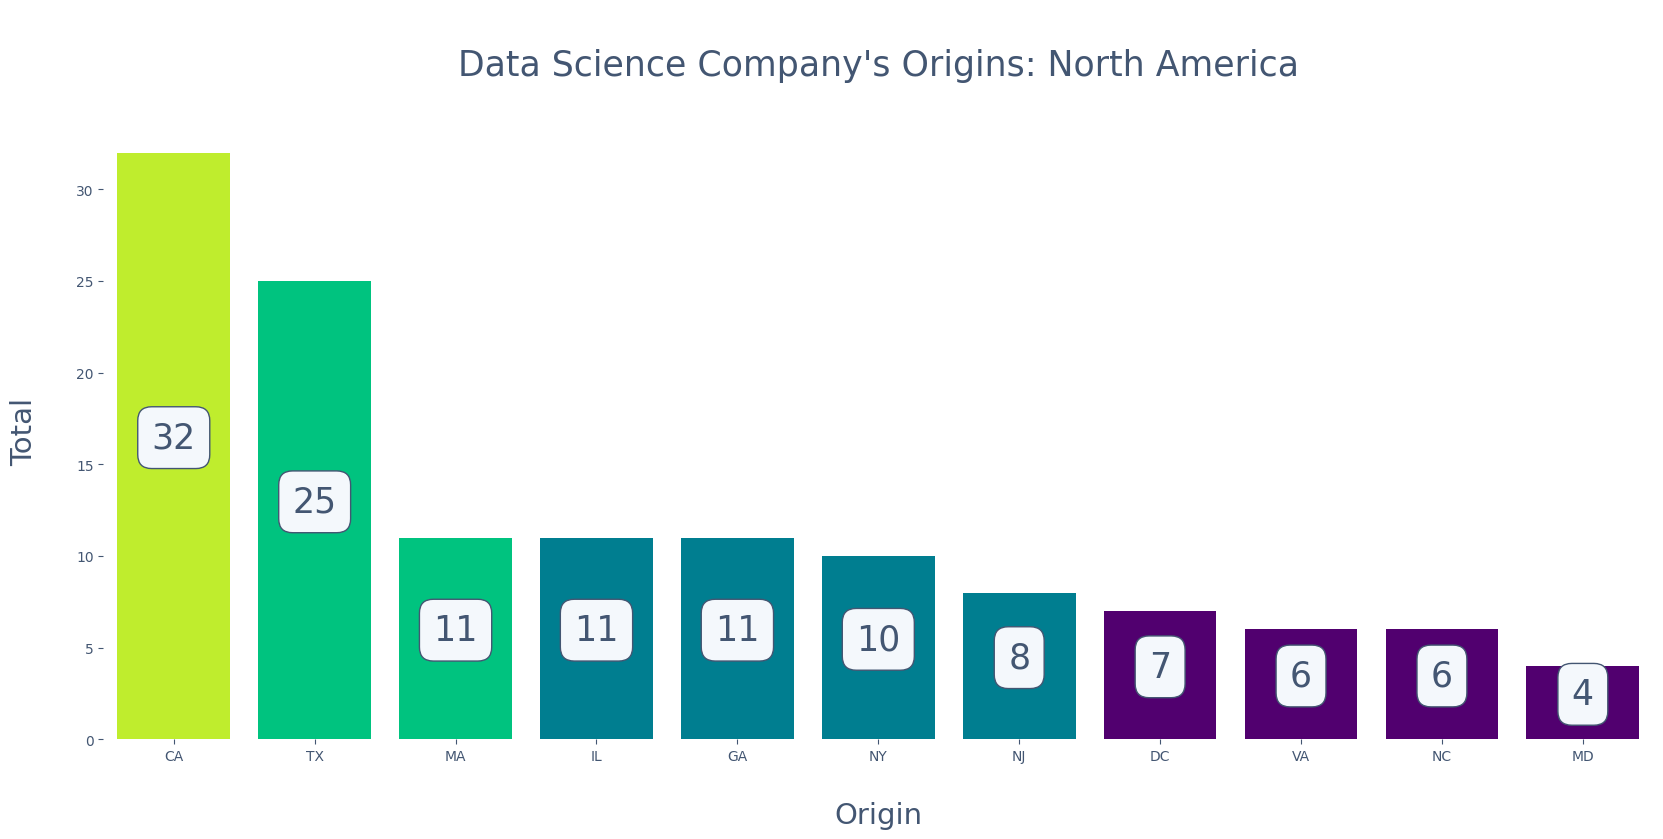

In [58]:
show_top_number_of_companies_per_country(data, 'North America')

In [59]:
import json

def show_number_of_jobs_per_state(data: pd.DataFrame, country: str):
    
    plot_data = data[data['Job_details']['Country'] == country]

    region_details = 'State'

    plot_data["Job_details"][region_details] = plot_data["Job_details"][region_details].str.strip()


    states = plot_data["Job_details"][region_details].str.strip().value_counts().index.tolist()
    values = plot_data["Job_details"][region_details].str.strip().value_counts().values.tolist()

    data = pd.DataFrame({
    "State": states,
    "Value": values
    })

    if country == 'Canada':
        locationmode=None
        scope="north america"
        with open("data\clean\_Socioeconomic data\canada_provinces.geo.json", "r") as geo:
            geojson = json.load(geo)
        featureidkey="properties.cartodb_id"

    elif country == 'United States':
        locationmode="USA-states"
        scope="usa"
        geojson = None
        featureidkey=None
    else:
        raise KeyError(f"Invalid country:\n{country}")  

    fig = px.choropleth(
        data_frame=data,
        locationmode=locationmode,
        locations="State",
        geojson=geojson,
        featureidkey=featureidkey,
        height=400,
        width=600,
        scope=scope,
        color="Value",
        hover_data=["State", "Value"],
        title="Sample Choropleth Map",
        labels={"Value": "Value"},
    )

    fig.update_layout(
        dragmode=False,
        margin=dict(l=0, r=0, b=0, t=50),
        title_text=f"Number of Jobs per Country in {country}",
        title_font_size=18,
        title_y = 0.955,
    )

    fig.update_traces(marker=dict(line=dict(color='#8d9bb7', width=1)))

    fig.show()


In [60]:
show_number_of_jobs_per_state(data, 'United States')

In [61]:
show_jobs_density(data, 'North America', geo_data)

### 1.3 South-East Asia and Oceania

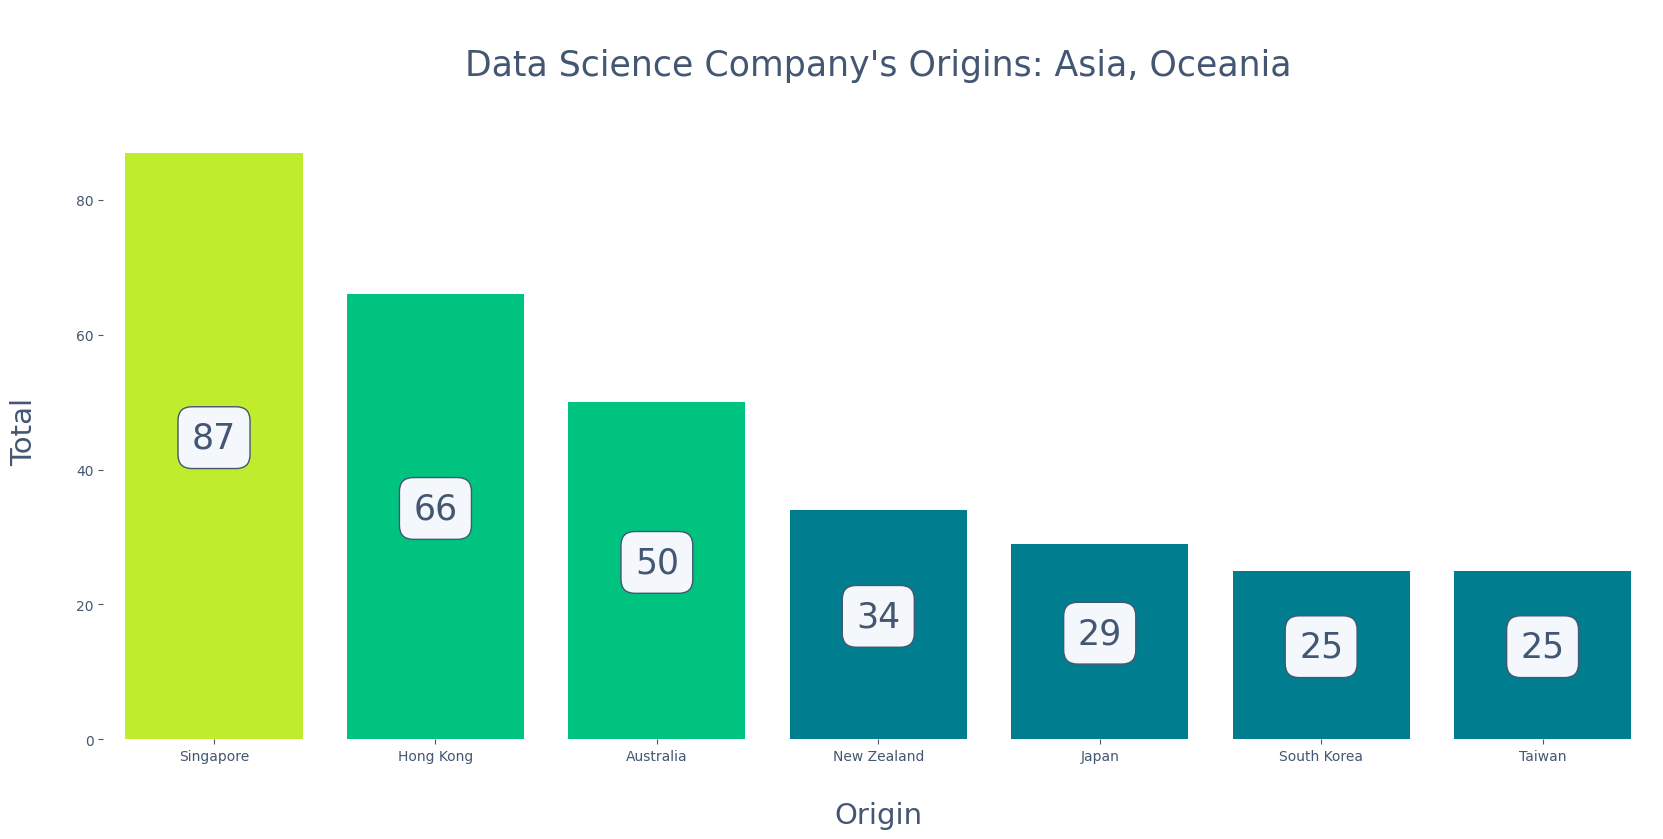

In [62]:
show_top_number_of_companies_per_country(data, ['Asia', 'Oceania'])

In [63]:
show_number_of_jobs_per_country(data, ['Asia', 'Oceania'], [93.31, 183.8], [-48.9, 50])

Note: Did you notice that small dot on the left? That's Singapore, and it has the highest score. But, keep in mind that the results should be taken with caution because Glassdoor may not be very popular in some Asian countries.

In [64]:
show_jobs_density(data, ['Asia', 'Oceania'], geo_data, {'lat': -4.5080, 'lon': 132.4200}, 1.3)

In [65]:
del geo_data

## 2. Salaries per Country

In [66]:
def salaries_per_country(data: pd.DataFrame, region: str | list[str]):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
        
        plot_data = pd.DataFrame()

        plot_data['State'] = data['Job_details']['State']
        plot_data['Country'] = data['Job_details']['Country']
        plot_data['Salary_avg'] = data['Salary']['Avg']
            
        return plot_data
    
    def show_plot(average_salary_by_country: pd.DataFrame, per_state: bool=False):

        fig, ax = plt.subplots(figsize=(12, 6))
        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4

        sns.barplot(data=average_salary_by_country, x='State' if per_state else 'Country', y='Salary_avg', palette=my_palette)

        plt.title(f"Average Salary by {'State' if per_state else 'Country'}", color="#435672", fontsize=16)
        plt.xlabel('\nState' if per_state else 'Country', color="#435672", fontsize=14)
        plt.ylabel("Average Salary\n", color="#435672", fontsize=14)

        plt.xticks(rotation=35, color="#435672")
        plt.yticks(color="#435672")

        sns.despine(left=True, bottom=True)
        
        plt.show()

    plot_data = narrow_data(data, region)

    if region == 'North America':
        per_state = True
    else:
        per_state = False

    average_salary_by_country = plot_data.groupby('State' if per_state else 'Country')['Salary_avg'].mean().reset_index().sort_values(by='Salary_avg', ascending=False)[:11]

    # return plot_data


    show_plot(average_salary_by_country, per_state)

### 2.1 The World

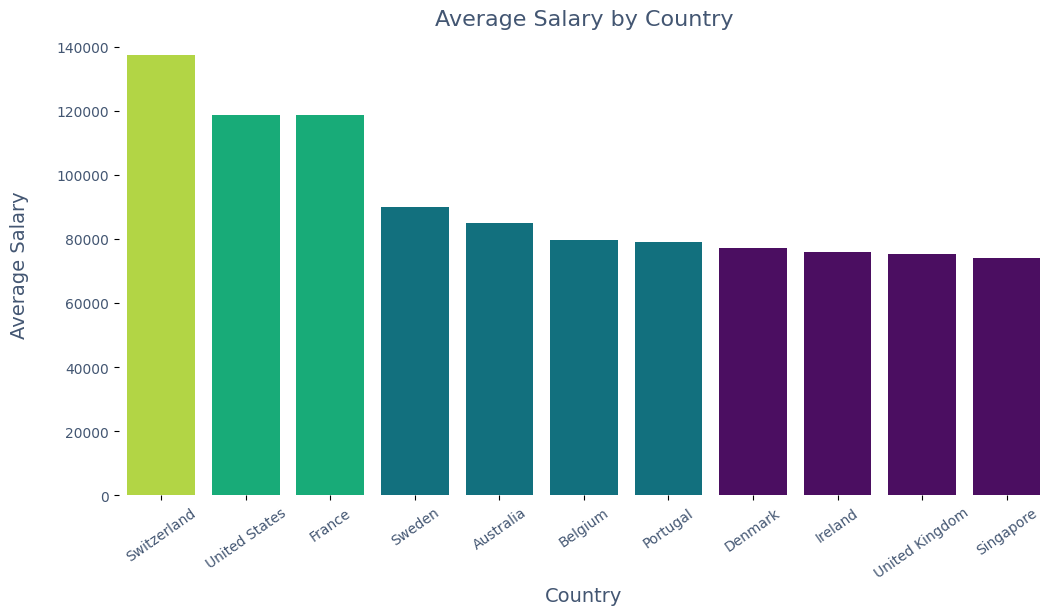

In [67]:
salaries_per_country(data, ['Europe', 'North America', 'Asia', 'Oceania'])

### 2.2 In United States per State

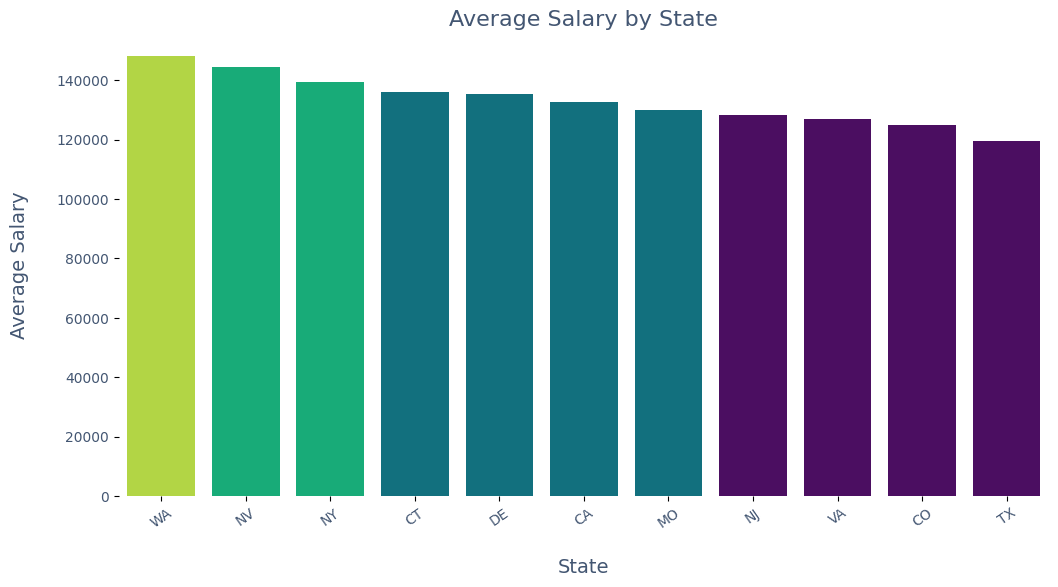

In [68]:
salaries_per_country(data, 'North America')

Note: The outcomes are pretty interesting. But the average salary could be skewed due to the small samples. In examples like:
NV, DE, MO, CO...

In [69]:
data[data['Job_details']['Country'] == "United States"]['Job_details']['State'].value_counts()

CA    32
TX    27
IL    12
NY    11
MA    11
GA    11
VA     9
NJ     8
DC     7
NC     7
PA     4
MD     4
UT     4
MI     4
MN     3
FL     3
WA     3
AZ     3
OH     3
TN     3
CO     3
OR     2
NV     1
HI     1
NH     1
CT     1
MT     1
RI     1
IN     1
KY     1
IA     1
WI     1
DE     1
MO     1
Name: State, dtype: int64

## 3. Age of Job Postings

In [70]:
import matplotlib.ticker as mtick

def show_distribution_ratings(ax, data: pd.DataFrame, region: str, title: str, color="#00c37f"):
    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )

        plot_data = data['Job_details']['Job_age']

        return plot_data

    plot_data = narrow_data(data, region)

    with plt.style.context('seaborn'):
        ax.set_title(title, size=16, color="#435672")
        sns.histplot(plot_data, ax=ax, color=color, line_kws={"edgecolor": "none"}, bins=30)
        ax.set_xlabel('\nDays', color="#435672")
        ax.set_ylabel('Frequency\n', color="#435672")
        ax.tick_params(colors="#435672")
        ax.spines['bottom'].set_color("#435672")
        ax.spines['left'].set_color("#435672")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(plot_data)))


In [71]:
def combine_plots(title, *args):
    num_plots = len(args)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 5))

    suptitle = fig.suptitle(title, size=25, color="#435672", weight="semibold")
    suptitle.set_y(1.10)  # Adjust the vertical position to add margin

    for i, (plot_args, color) in enumerate(args):
        ax = axes[i]
        show_distribution_ratings(ax, *plot_args, color=color)

    plt.show()

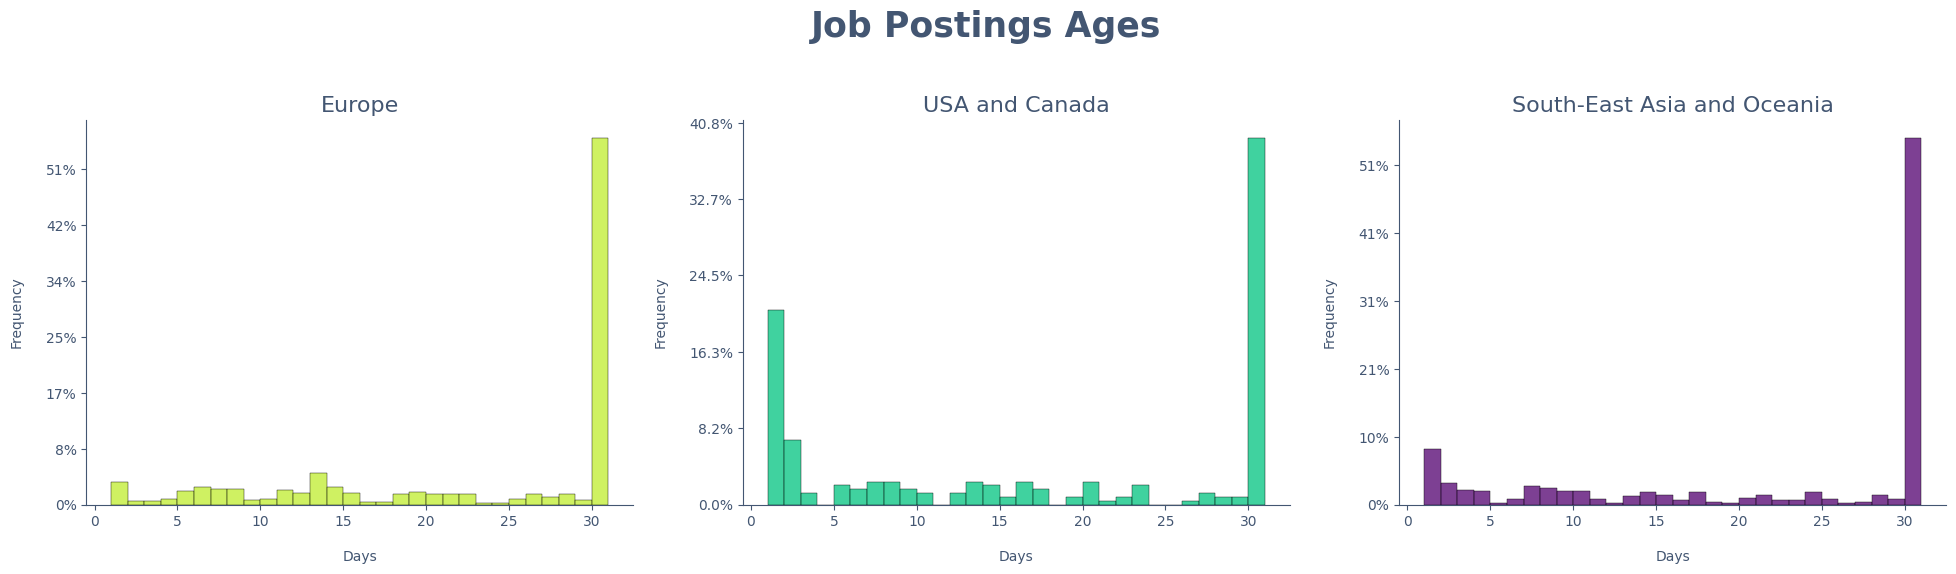

In [72]:
combine_plots(
    "Job Postings Ages",
    ((data, "Europe", "Europe"), "#bfed2d"),
    ((data, "North America", "USA and Canada"), "#00c37f"),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f"),
)

Note:<br>
The value 31 days means that its 30 days +. That value take 31 days, as 60, 100 or even more.<br>
As you'll see most job postings are 30+ days old. Which sounds like positions that are difficult to fill.

## 4. Top 10 Industries with the Highest Number of Jobs

In [73]:
import matplotlib.ticker as mtick

def show_top_industries_per_country(data: pd.DataFrame, region: str | list[str]):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        if isinstance(region, list):
            plot_data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            plot_data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
            
        return plot_data
    
    def get_countries(region):
        
        if isinstance(region, list):
            title_countries = ", ".join(region)
        else:
            title_countries = region
        return title_countries

    def show_plot(plot_data, title_countries):
        fig, ax = plt.subplots(figsize=(20, 8))

        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4

        top_industries = plot_data['Company_info']['Sector'].str.replace(" ", "\n").value_counts().index[:10]

        p = sns.countplot(
            x=plot_data['Company_info']['Sector'].str.replace(" ", "\n"),
            order=top_industries,
            saturation=1,
            linewidth=0,
            palette=my_palette,
            ax=ax
        )

        p.set_title(f"\nCompany Sectors: {title_countries}\n", fontsize=25, color="#435672")
        p.set_xlabel("\nSector", fontsize=21, color="#435672")
        p.set_ylabel("Percentage\n", fontsize=21, color="#435672")
        p.yaxis.label.set_color("#435672")
        p.tick_params(colors='#435672', which='both')

        total_count = len(plot_data['Company_info']['Sector'])
        p.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_count))

        percentages = [f"{num / total_count * 100:.1f}%" for num in plot_data['Company_info']['Sector'].value_counts().values.tolist()]

        for i, patch in enumerate(p.patches):
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height()
            percentage = percentages[i]
            p.annotate(percentage, (x, y), ha='center', va='bottom', color="#435672", size=21)

        sns.despine(left=True, bottom=True)
        plt.show()


    plot_data = narrow_data(data, region)

    title_countries = get_countries(region)
    
    show_plot(plot_data, title_countries)

### 4.1 Europe

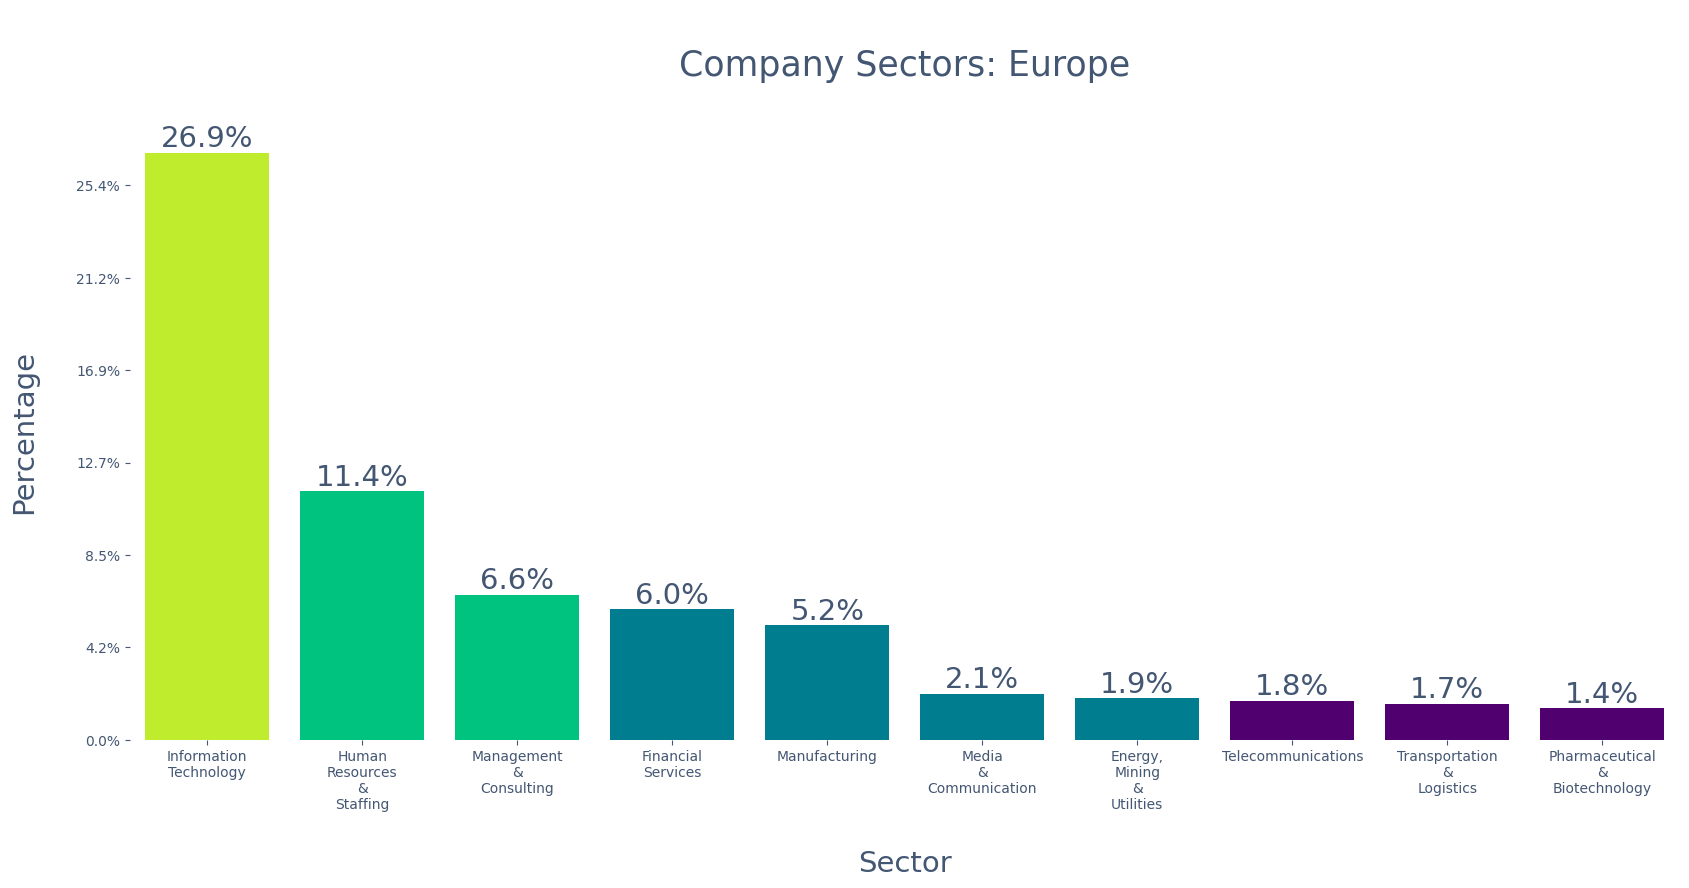

In [74]:
show_top_industries_per_country(data, 'Europe')

### 4.1 USA + Canada

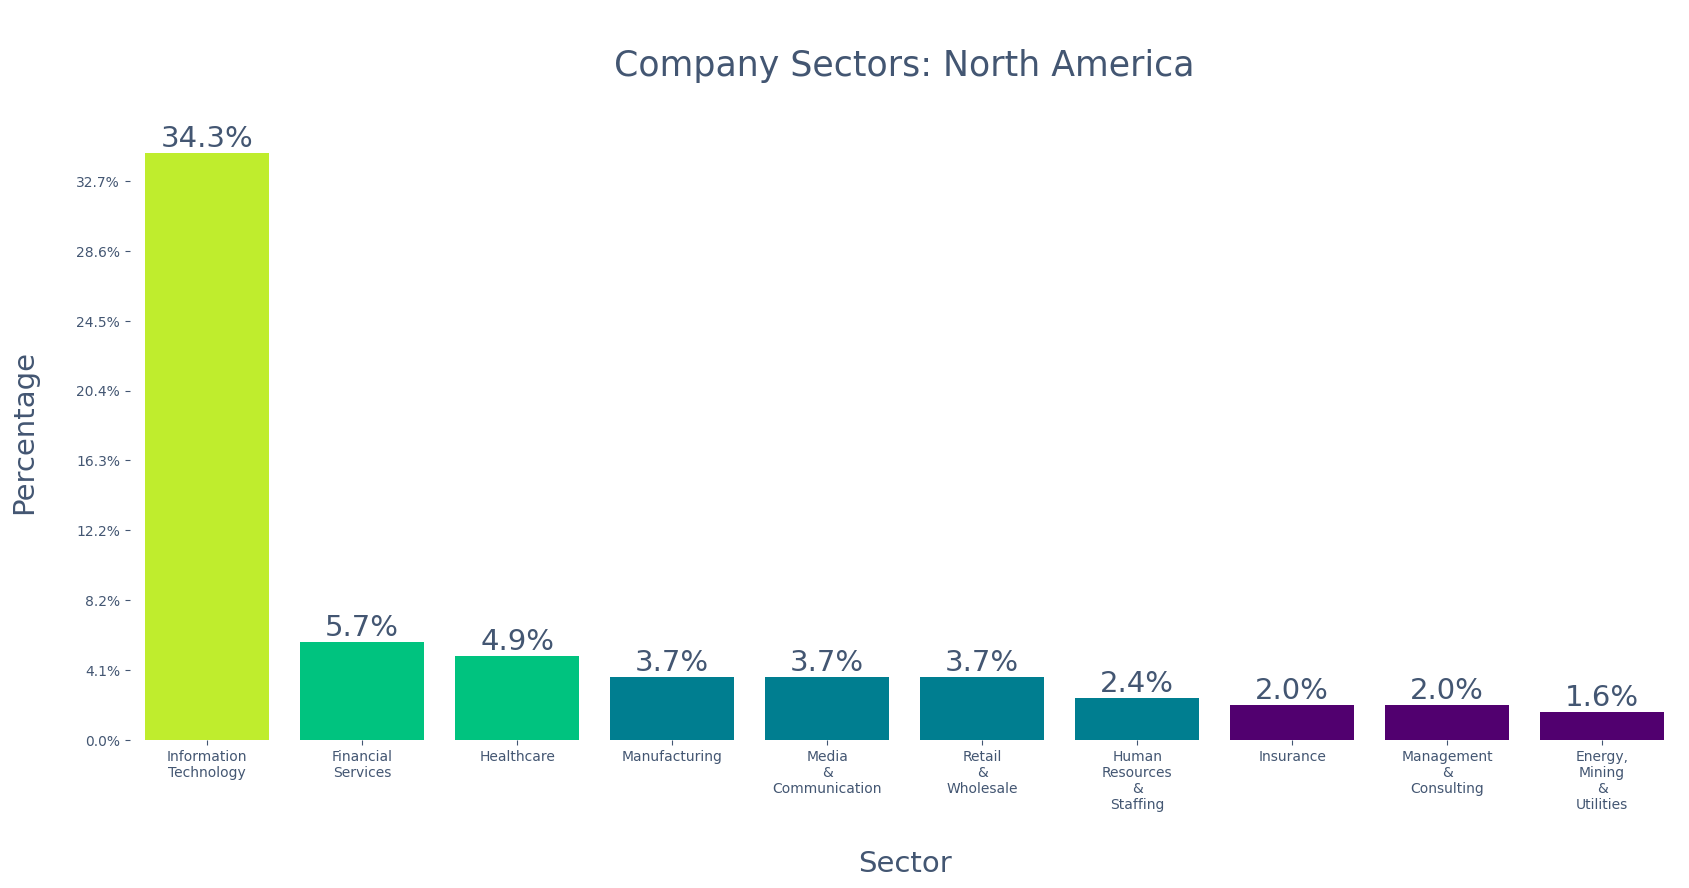

In [75]:
show_top_industries_per_country(data, 'North America')

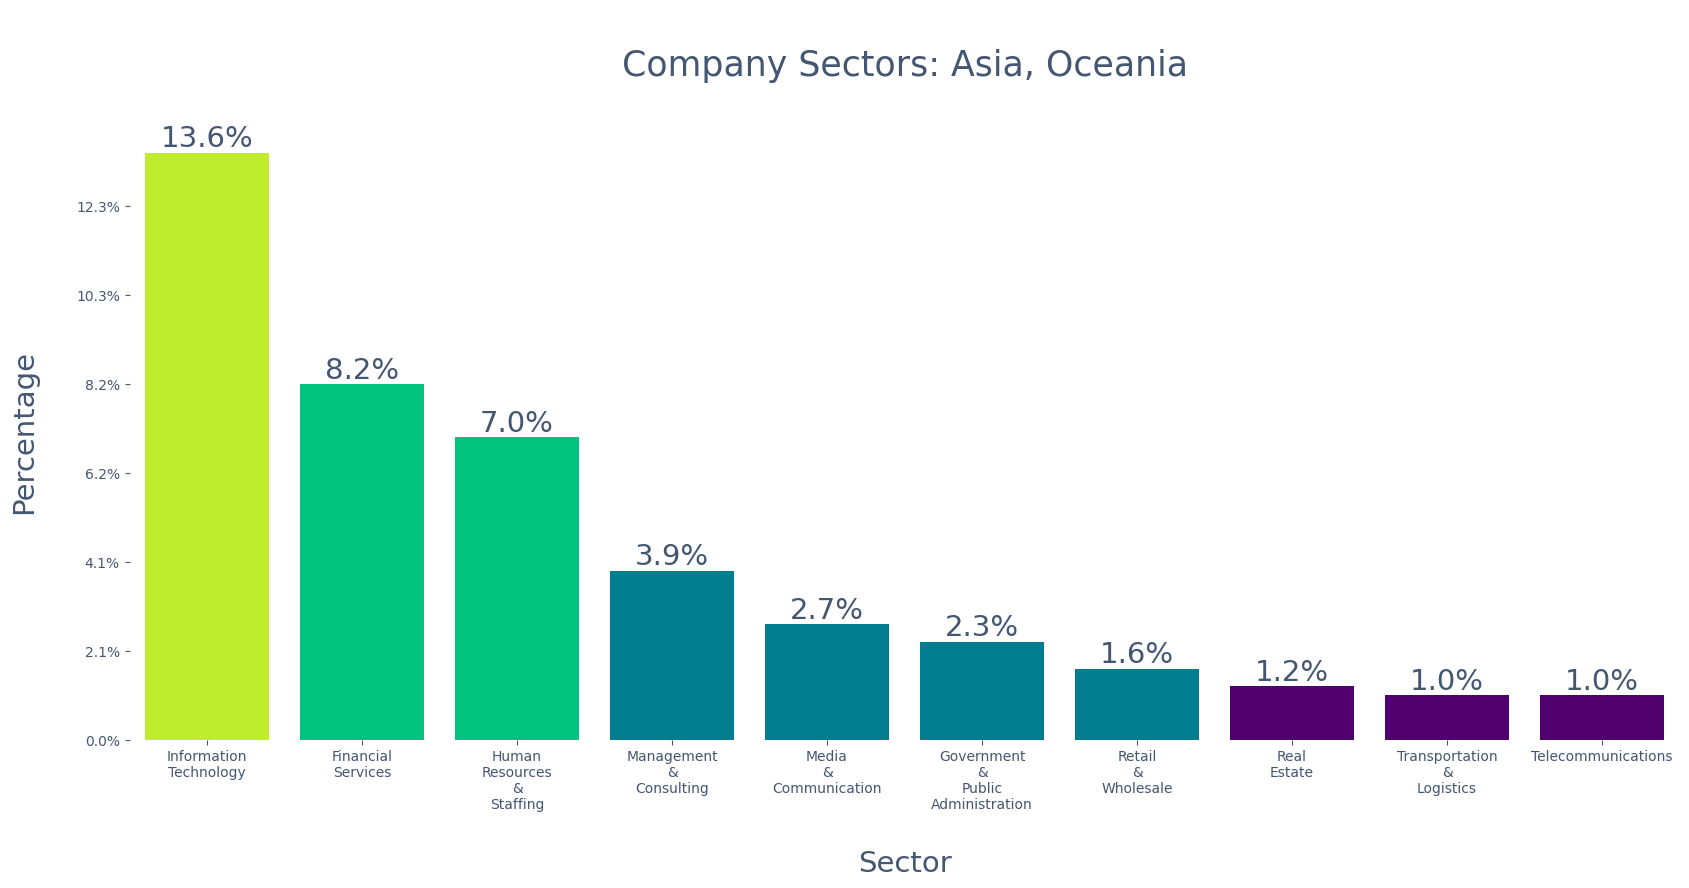

In [76]:
show_top_industries_per_country(data, ['Asia', 'Oceania'])

Note: The sector of IT leads the way

### 5. Top 10 Industries with the Highest Salaries

In [77]:
def show_top_salaries_per_industries(data: pd.DataFrame, region: str | list[str]):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")

        plot_data =  pd.DataFrame()
        
        plot_data['Sector'] = data['Company_info']['Sector']
        plot_data['Salary'] = data['Salary']['Avg']

        data_sorted = plot_data.sort_values(by='Salary', ascending=False)
            
        return data_sorted
    
    def get_countries(region):
        
        if isinstance(region, list):
            title_countries = ", ".join(region)
        else:
            title_countries = region
        return title_countries

    def show_plot(plot_data, title_countries):

        fig, ax = plt.subplots(figsize=(20, 8))

        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4

        plot_data['Sector'] = plot_data['Sector'].str.replace(" ", "\n")
        plot_data['Salary'] = plot_data['Salary'].round().astype(int)

        p = sns.barplot(
                data=plot_data, 
                x='Sector', 
                y='Salary', 
                saturation=1,
                linewidth=0,
                palette=my_palette,
                ax=ax
            )

        p.set_title(f"\nCompany Sectors: {title_countries}\n", fontsize=25, color="#435672")
        p.set_xlabel("\nSector", fontsize=21, color="#435672")
        p.set_ylabel("Average Salary (USD)\n", fontsize=21, color="#435672")
        p.yaxis.label.set_color("#435672")
        p.tick_params(colors='#435672', which='both')

        for container in p.containers:
            p.bar_label(container,label_type="center",padding=6,size=16,color="#435672",rotation=0,
        bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#f4f8fc", "alpha": 1, "edgecolor": "#435672"})

        sns.despine(left=True, bottom=True)
        plt.show()


    plot_data = narrow_data(data, region)

    title_countries = get_countries(region)

    average_salary_by_sector = plot_data.groupby('Sector')['Salary'].mean().reset_index().sort_values(by='Salary', ascending=False)[:11]
    
    show_plot(average_salary_by_sector, title_countries)

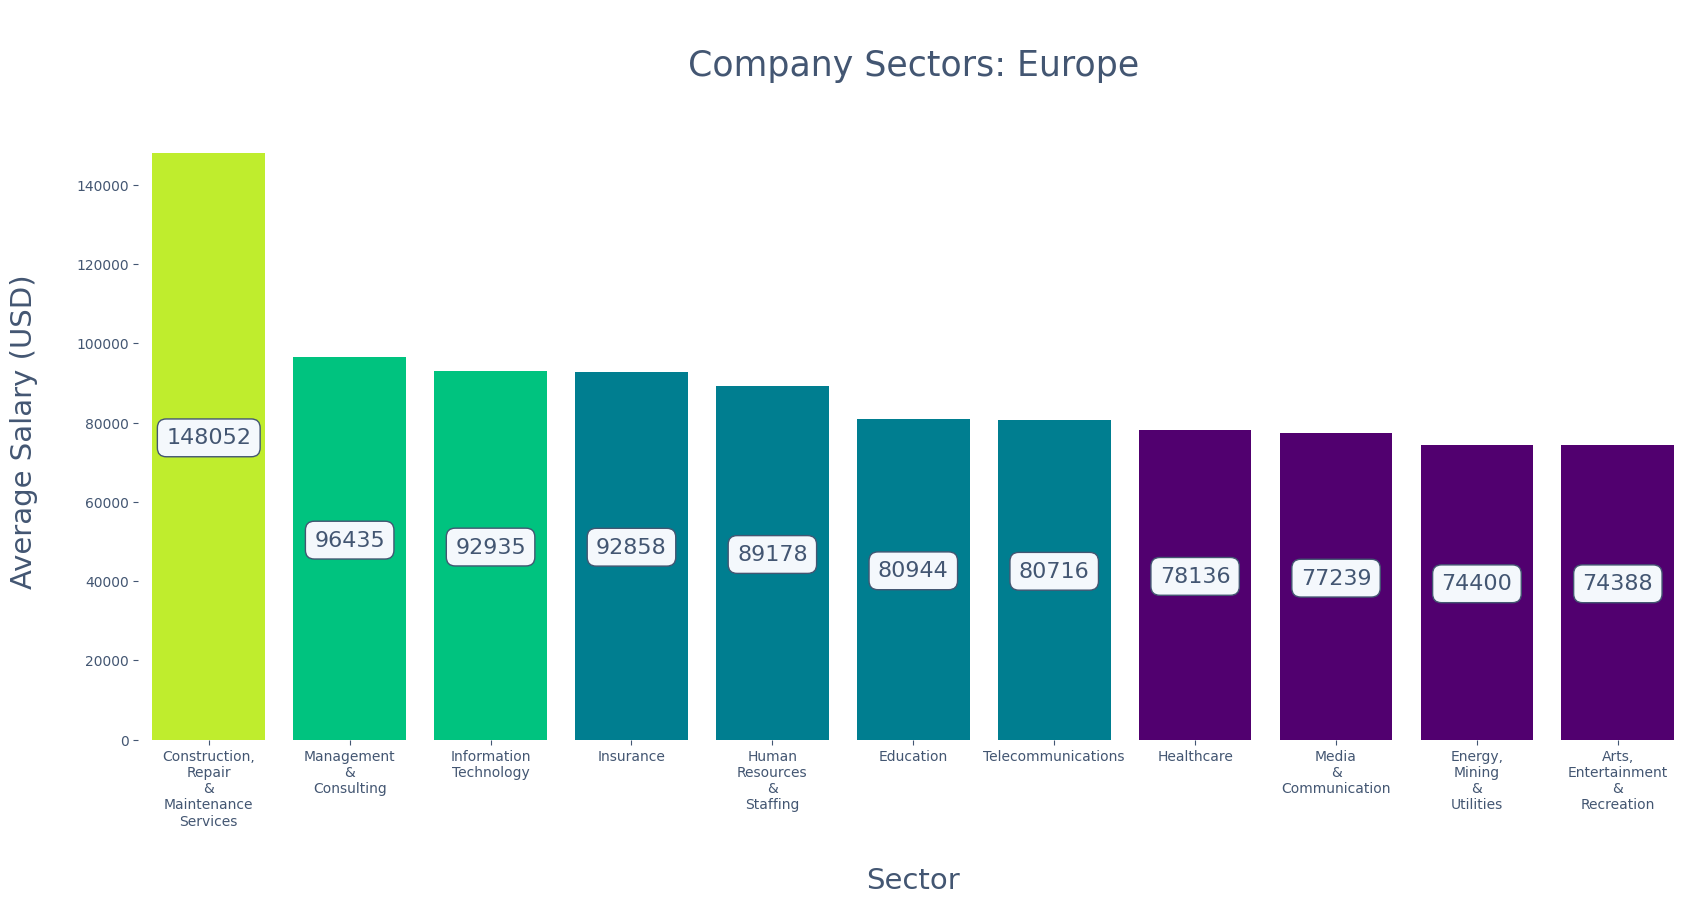

In [78]:
show_top_salaries_per_industries(data, "Europe")

To make sure if sure the results are not skewed by small samples, we will do a small check up:

In [79]:
def check_up(data: pd.DataFrame, region: str | list[str]):

    if isinstance(region, list):
        data = data[data['Job_details']['Region'].isin(region)]
    elif isinstance(region, str):
        data = data[data['Job_details']['Region'] == region]
    else:
        raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")

    narrowed_data =  pd.DataFrame()
    
    narrowed_data['Sector'] = data['Company_info']['Sector']
    narrowed_data['Salary'] = data['Salary']['Avg']

    data_sorted = narrowed_data.sort_values(by='Salary', ascending=False)

    top_salaries_sectors = data_sorted.groupby('Sector')['Salary'].mean().reset_index().sort_values(by='Salary', ascending=False)[:10]
    
    sector_counts = data_sorted[data_sorted['Sector'].isin(top_salaries_sectors['Sector'])]['Sector'].value_counts()

    sector_reindexed = sector_counts.reindex(top_salaries_sectors['Sector'])

    print(sector_reindexed)

check_up(data, 'Europe')

Sector
Construction, Repair & Maintenance Services     22
Management & Consulting                        157
Information Technology                         635
Insurance                                       27
Human Resources & Staffing                     269
Education                                       15
Telecommunications                              42
Healthcare                                       8
Media & Communication                           50
Energy, Mining & Utilities                      45
Name: Sector, dtype: int64


A rule of thumb in statistics says that the sample size is considered "large enough" if it's greater than or equal to 30. So it is advised to take a grain of salt to results from sectors like:
- Construction, Repair & Maintenance Services
- Insurance
- Education
- Healthcare

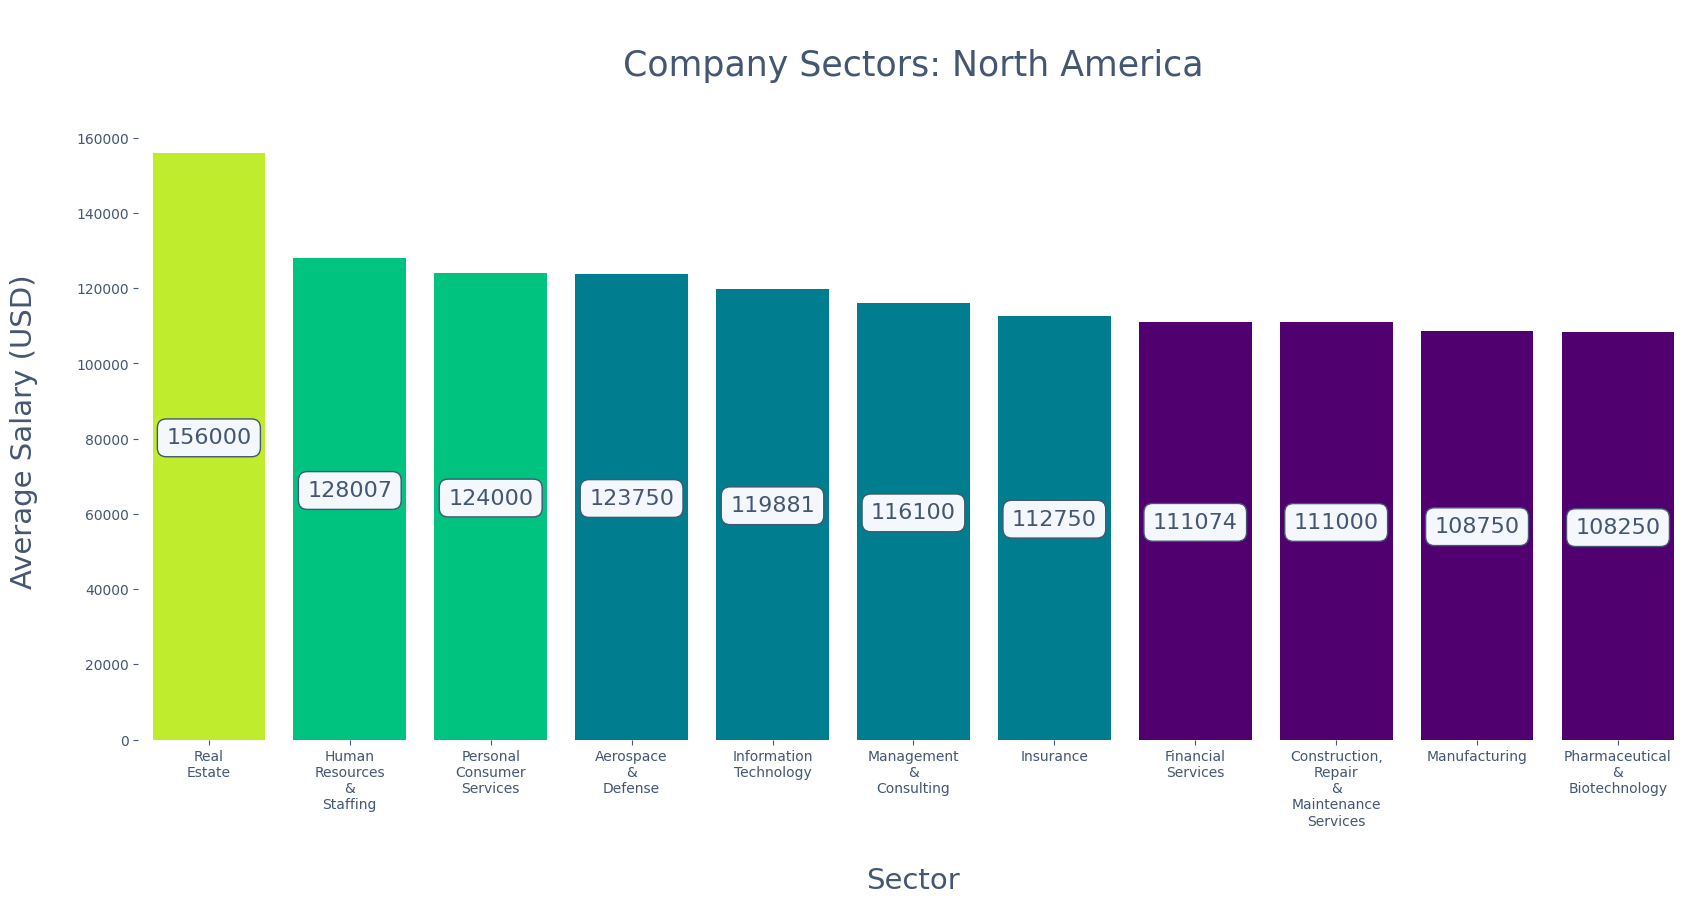

Sector
Real Estate                                     1
Human Resources & Staffing                      6
Personal Consumer Services                      1
Aerospace & Defense                             2
Information Technology                         84
Management & Consulting                         5
Insurance                                       5
Financial Services                             14
Construction, Repair & Maintenance Services     1
Manufacturing                                   9
Name: Sector, dtype: int64


In [80]:
show_top_salaries_per_industries(data, "North America")
check_up(data, "North America")

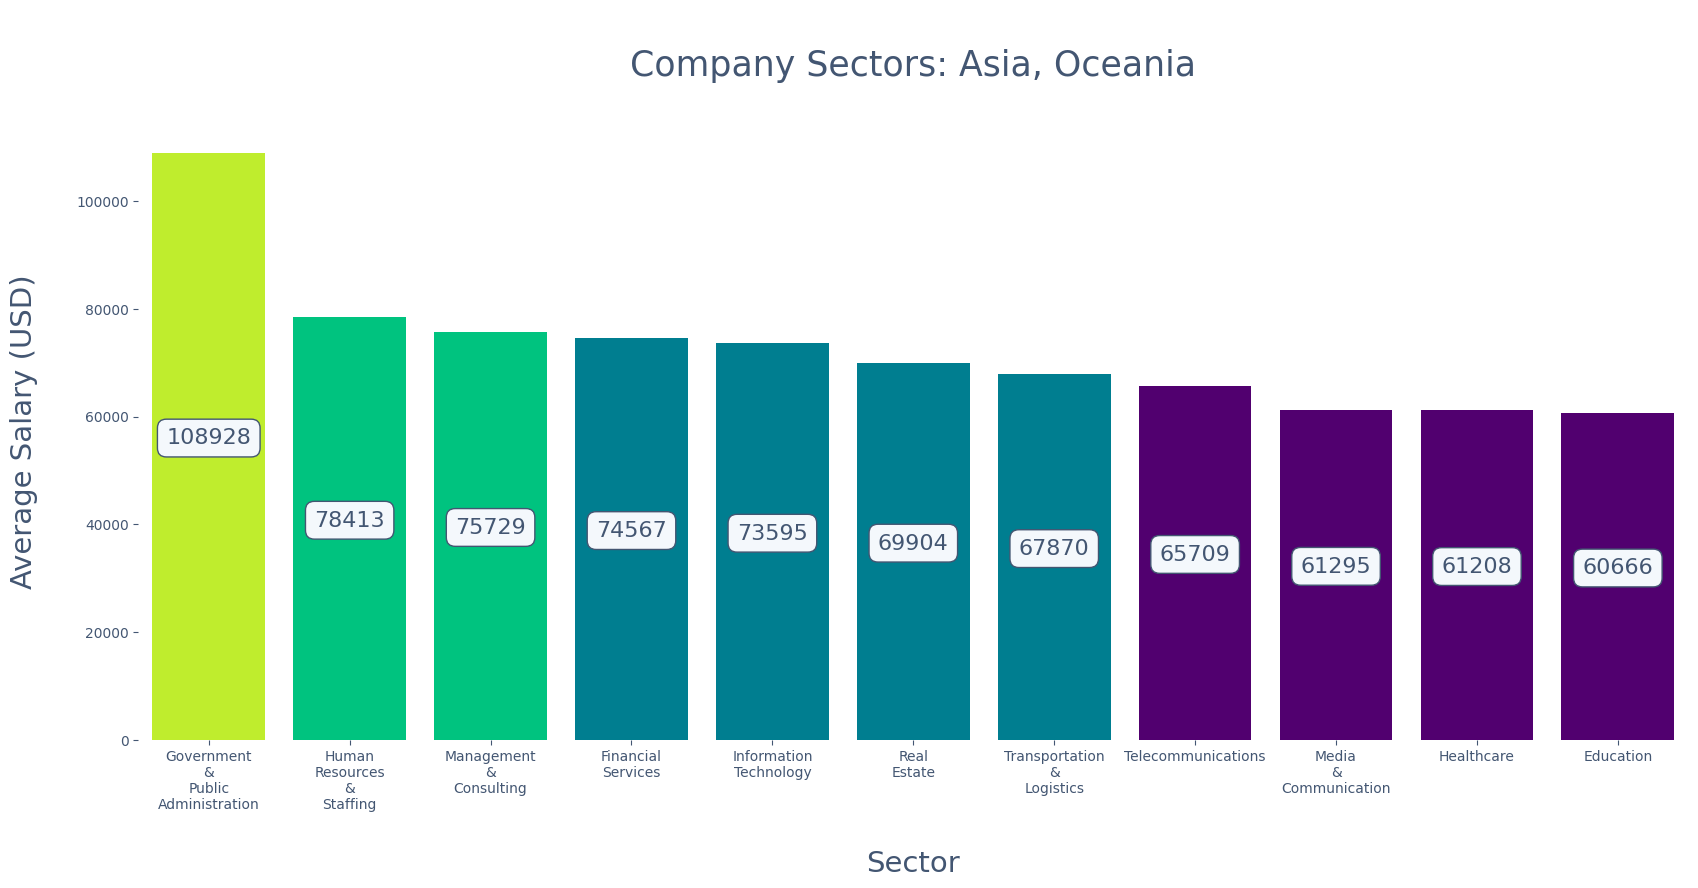

Sector
Government & Public Administration    11
Human Resources & Staffing            34
Management & Consulting               19
Financial Services                    40
Information Technology                66
Real Estate                            6
Transportation & Logistics             5
Telecommunications                     5
Media & Communication                 13
Healthcare                             4
Name: Sector, dtype: int64


In [81]:
show_top_salaries_per_industries(data, ["Asia", "Oceania"])
check_up(data, ["Asia", "Oceania"])

In [82]:
data[(data['Job_details']['Region'].isin(["Asia", "Oceania"]) & (data['Company_info']['Sector'] == "Government & Public Administration"))]['Job_details']['Country'].value_counts()

Singapore      9
New Zealand    2
Name: Country, dtype: int64

Note: The unusual high salaries in gov is skewed by Singapore

## 6. Companies with Maximum Number of Job Openings

In [83]:
import matplotlib.ticker as ticker

def show_top_employers_by_vacancy(data: pd.DataFrame, region: str | list[str]):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        if isinstance(region, list):
            plot_data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            plot_data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
            
        return plot_data
    
    def get_countries(region):
        
        if isinstance(region, list):
            title_countries = ", ".join(region)
        else:
            title_countries = region
        return title_countries

    def show_plot(plot_data, title_countries):

        fig, ax = plt.subplots(figsize=(20, 8))

        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4

        plot_data.loc[plot_data['Company_info']['Name'] == "메가존", ('Company_info', 'Name')] = "MEGAZONE"

        top_industries = plot_data['Company_info']['Name'].str.replace(" ", "\n").value_counts().index[:10]

        p = sns.countplot(
            x=plot_data['Company_info']['Name'].str.replace(" ", "\n"),
            order=top_industries,
            saturation=1,
            linewidth=0,
            palette=my_palette,
            ax=ax
        )

        p.set_title(f"\nTop employers by jobs openings: {title_countries}\n", fontsize=25, color="#435672")
        p.set_xlabel("\nCompanies", fontsize=21, color="#435672")
        p.set_ylabel("Jobs\n", fontsize=21, color="#435672")
        p.yaxis.label.set_color("#435672")
        p.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        p.tick_params(colors='#435672', which='both')

        for container in p.containers:
            p.bar_label(container,label_type="center",padding=6,size=25,color="#435672",rotation=0,
        bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#f4f8fc", "alpha": 1, "edgecolor": "#435672"})
            
        sns.despine(left=True, bottom=True)
        plt.show()


    plot_data = narrow_data(data, region)

    title_countries = get_countries(region)
    
    show_plot(plot_data, title_countries)

### 6.1 Europe

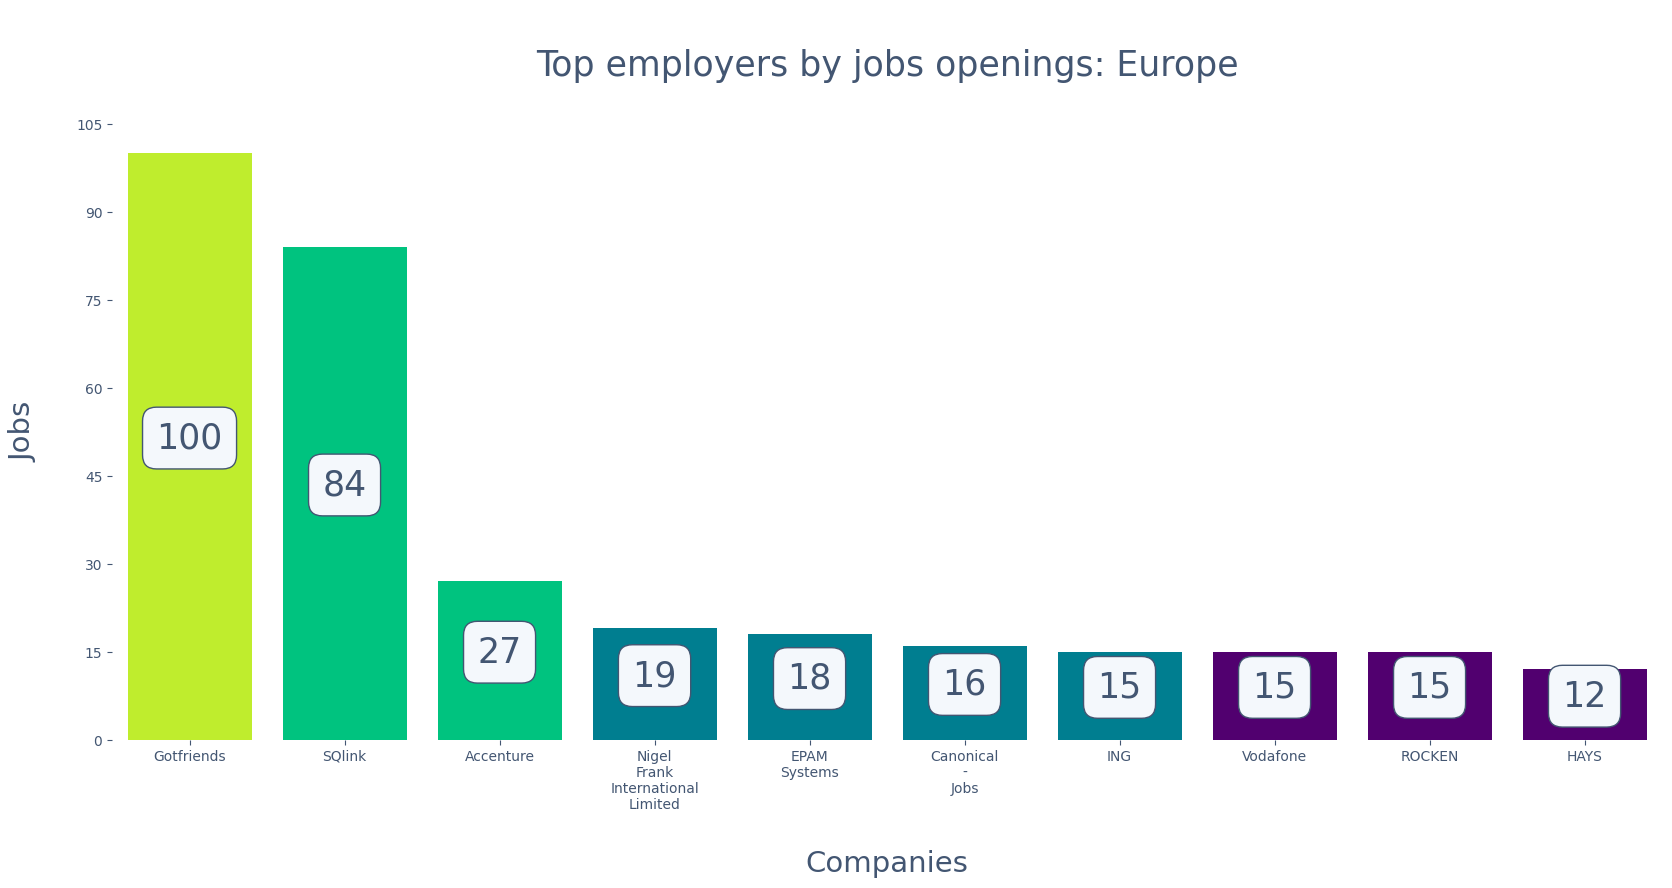

In [84]:
show_top_employers_by_vacancy(data, "Europe")

Note:
- The `Gotfriends`, `HAYS`, and `ROCKEN` are job Tech Recruiting Firm
- `SQLink`, `Accenture`, `Nigel Frank International`, and `EPAM Systems` are IT Solutions Providers
- `Canonical` is a developer and supporter the Ubuntu, the most popular Linux distro so far
- `ING` is a popular banking brand in Europe, it operates in more than 40 countries
- `Vodafone` is a telecommunications company

### 6.2 USA + Canada

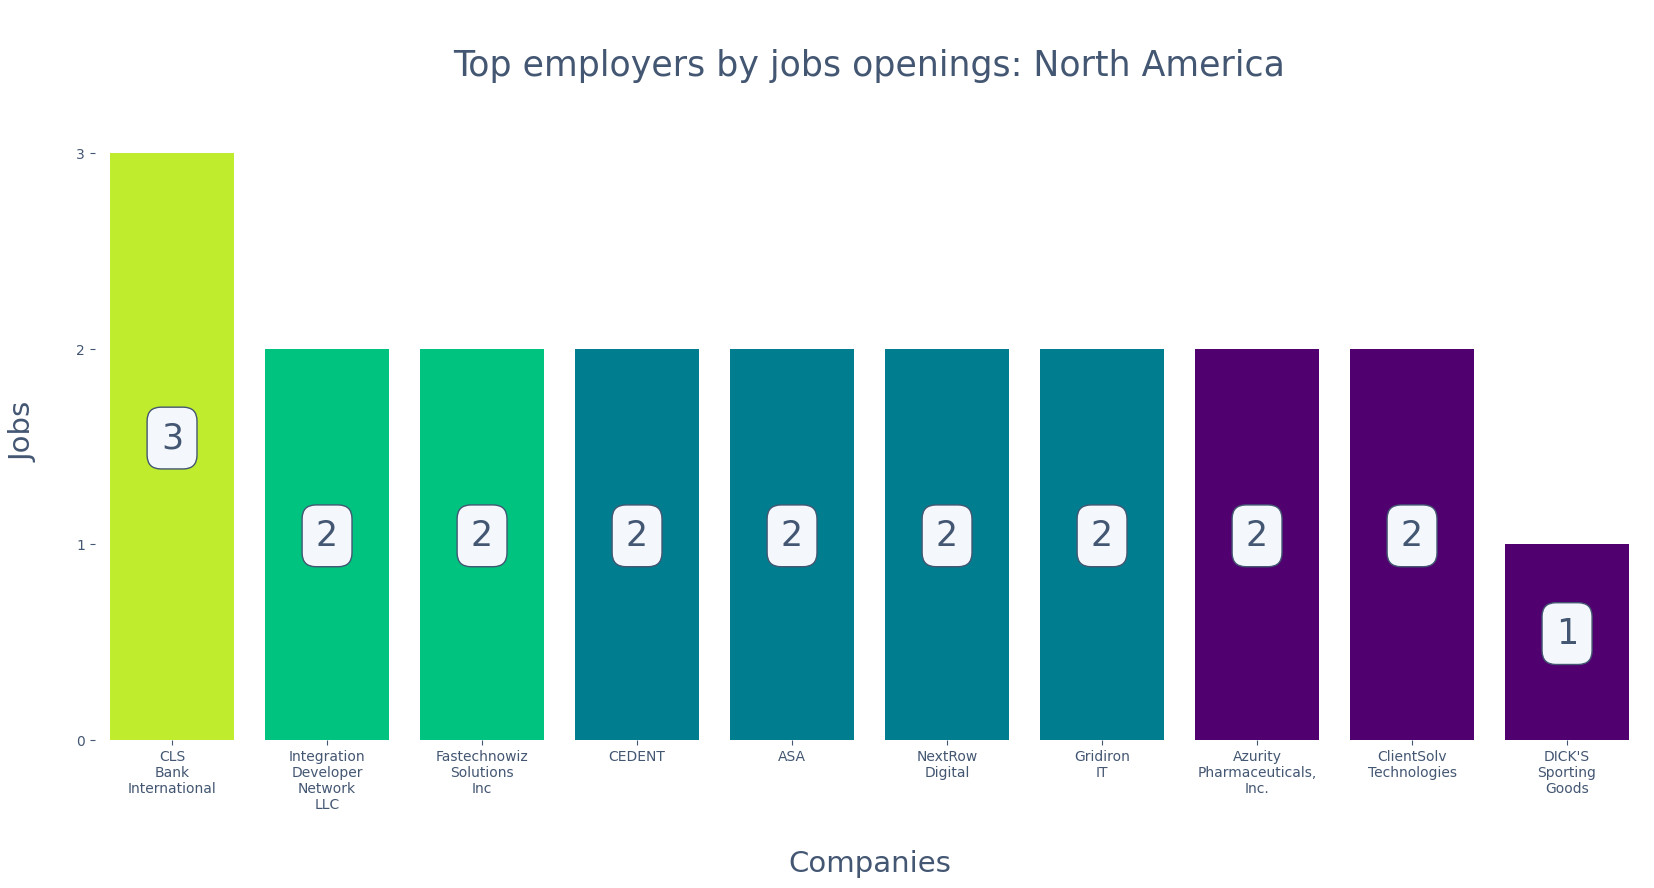

In [85]:
show_top_employers_by_vacancy(data, "North America")

Note:
- The `CLS Bank International`, `Fastechnowiz Solutions Inc`, `CEDENT`, `ClientSolv ` are IT Solutions Providers
- `ASA` is a real estate brokerage and advisory firm
- `NextRow Digital` is an IT Solutions Providers, but it specialized in marketing
- `Gridiron IT` is a job Tech Recruiting Firm
- `Azurity Pharmaceuticals` specializes in providing treatments for patients requiring customized formulations
- `DICK'S Sporting Goods` besides the unusual name is sporting goods chain with equipment

### 6.3 South-East Asia and Oceania

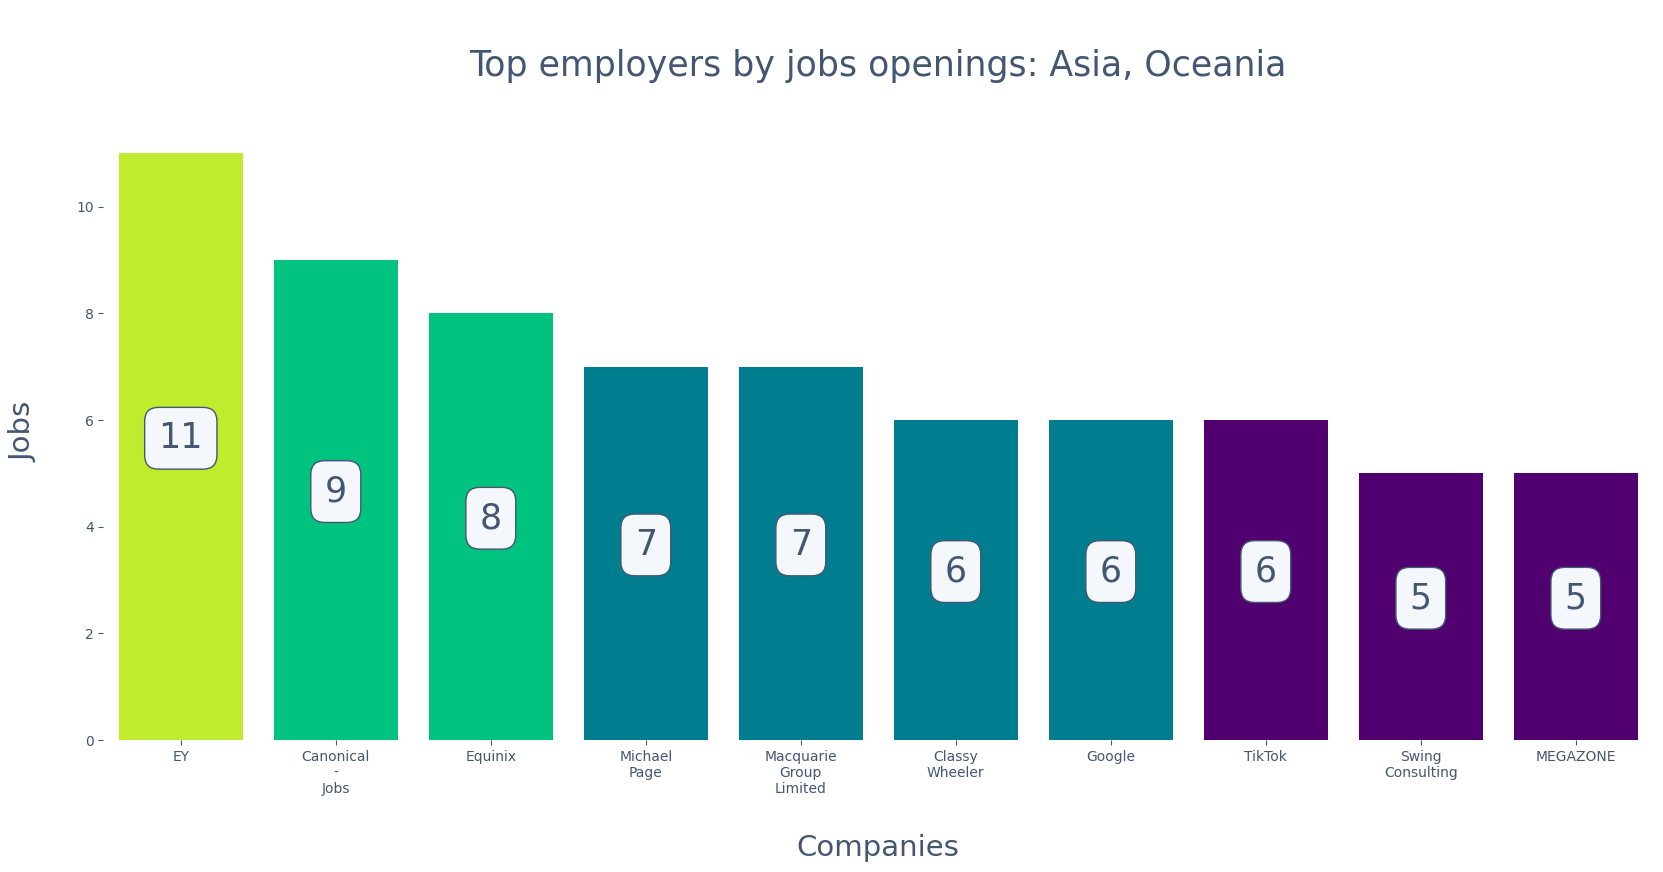

In [86]:
show_top_employers_by_vacancy(data, ["Asia", "Oceania"])

Note:
- `Ernst & Young aka EY` is an assurance, consulting, strategy and transactions, and tax services firm
- `Canonical` is a developer and supporter the Ubuntu, the most popular Linux distro so far
- `Equinix` specializes in Internet connection and data centers.
- `Michael Page`, `Classy Wheeler` are job Tech Recruiting Firms
- `Macquarie Group Limited` is a financial services group
- `Google`, `Tik Tok` are Big IT Brands
- `DICK'S Sporting Goods` besides the unusual name is sporting goods chain with equipment
- `Swing Consulting` is an IT Solutions Providers
- The last one `메가존 aka MEGAZONE` is a Korean IT Cloud consulting firm (Mainly AWS)

## 7. Company Ratings

In [185]:
def show_distribution_ratings(ax, data: pd.DataFrame, region: str, title: str, column: str, color: str="#00c37f"):
    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )

        plot_data = data['Company_info'][column]

        return plot_data

    plot_data = narrow_data(data, region)

    with plt.style.context('seaborn'):
        ax.set_title(title, size=16, color="#435672")
        sns.histplot(plot_data, ax=ax, color=color, line_kws={"edgecolor": "none"}, bins=20)
        ax.set_xlabel('\nDays', color="#435672")
        ax.set_ylabel('Frequency\n', color="#435672")
        ax.tick_params(colors="#435672")
        ax.spines['bottom'].set_color("#435672")
        ax.spines['left'].set_color("#435672")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(plot_data)))

In [186]:
def combine_plots(title: str, *args):
    num_plots = len(args)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 5))

    suptitle = fig.suptitle(title, size=25, color="#435672", weight="semibold")
    suptitle.set_y(1.10)  # Adjust the vertical position to add margin

    for i, (plot_args, color, column) in enumerate(args):
        ax = axes[i]
        show_distribution_ratings(ax, *plot_args, color=color, column=column)

    plt.show()

Attention!: Please take note that the y-axis is different for each plot!

### 7.1 Ratings

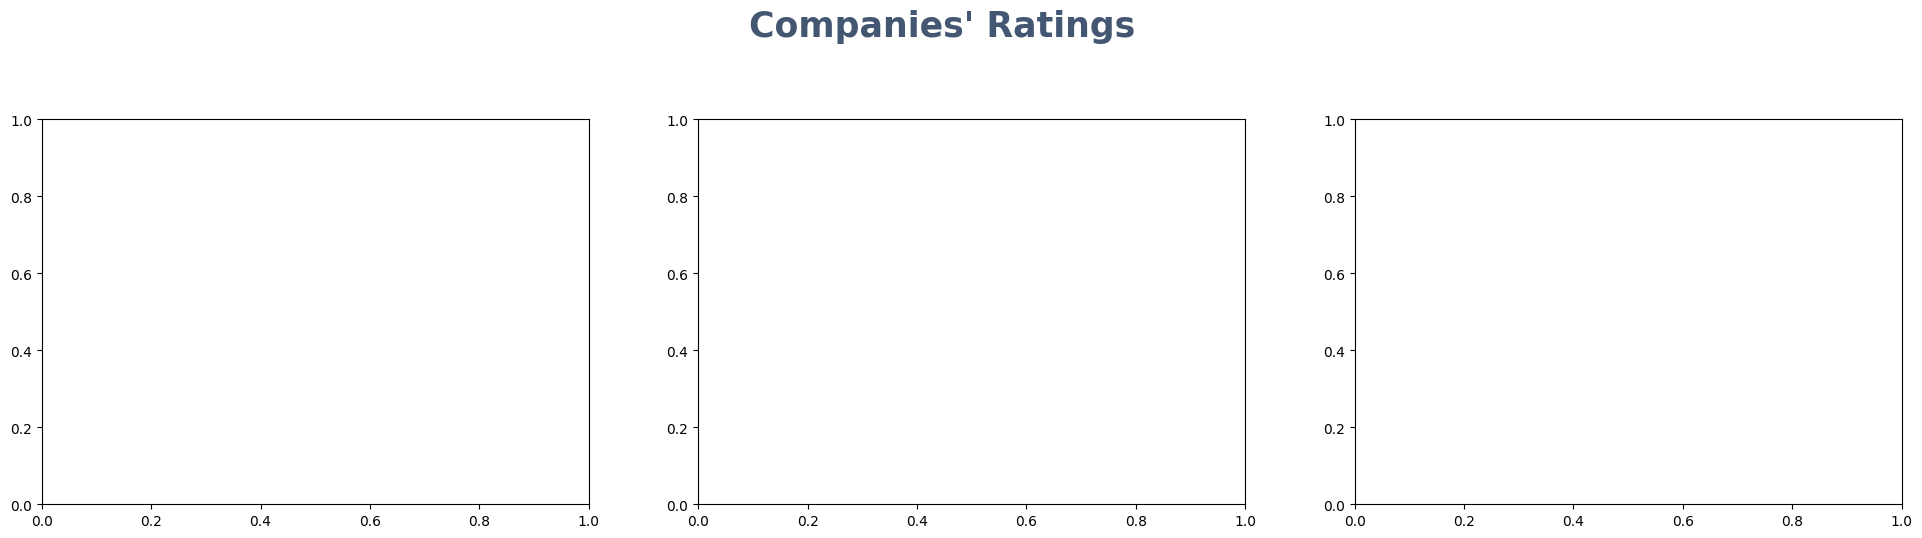

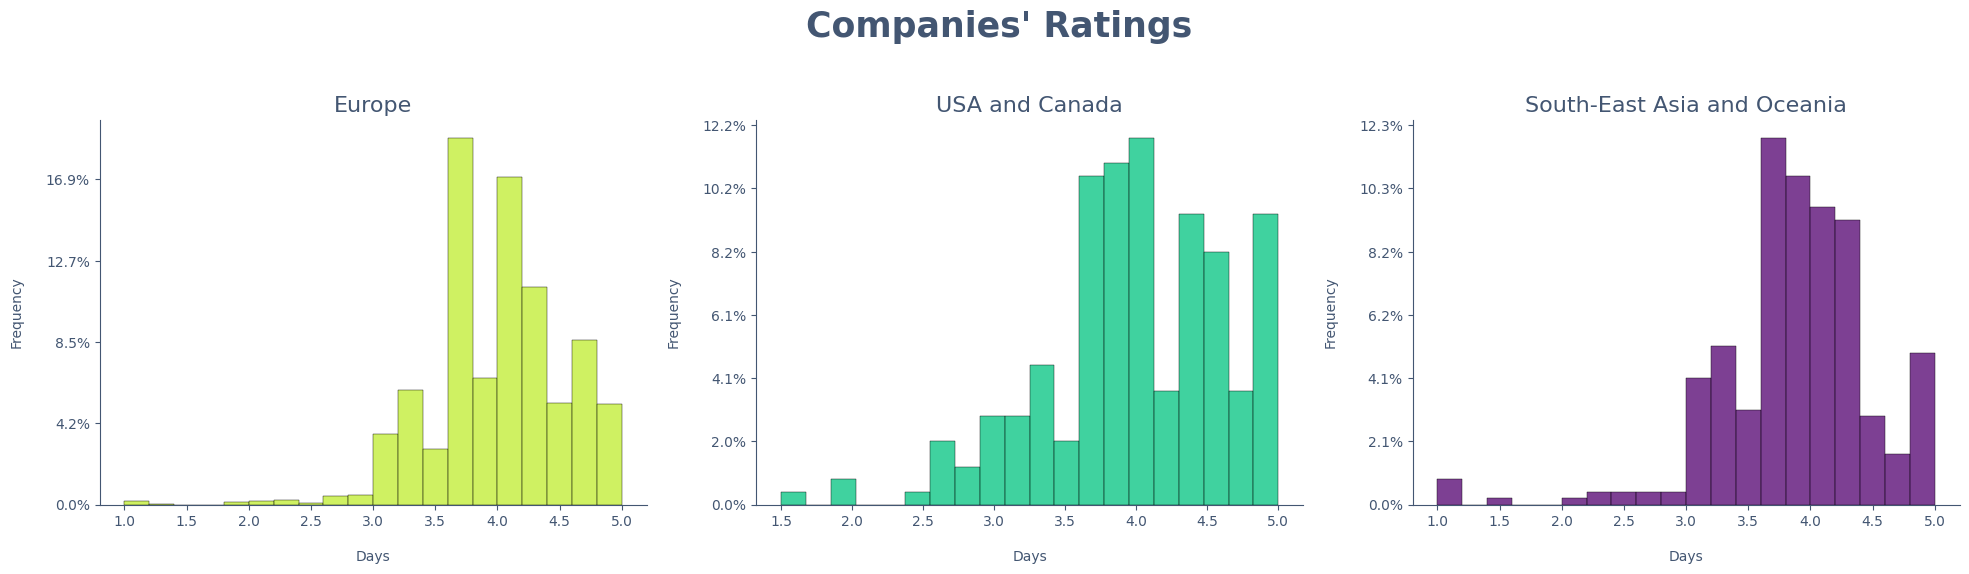

In [187]:
column = 'Rating'

combine_plots(
    "Companies' Ratings",
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

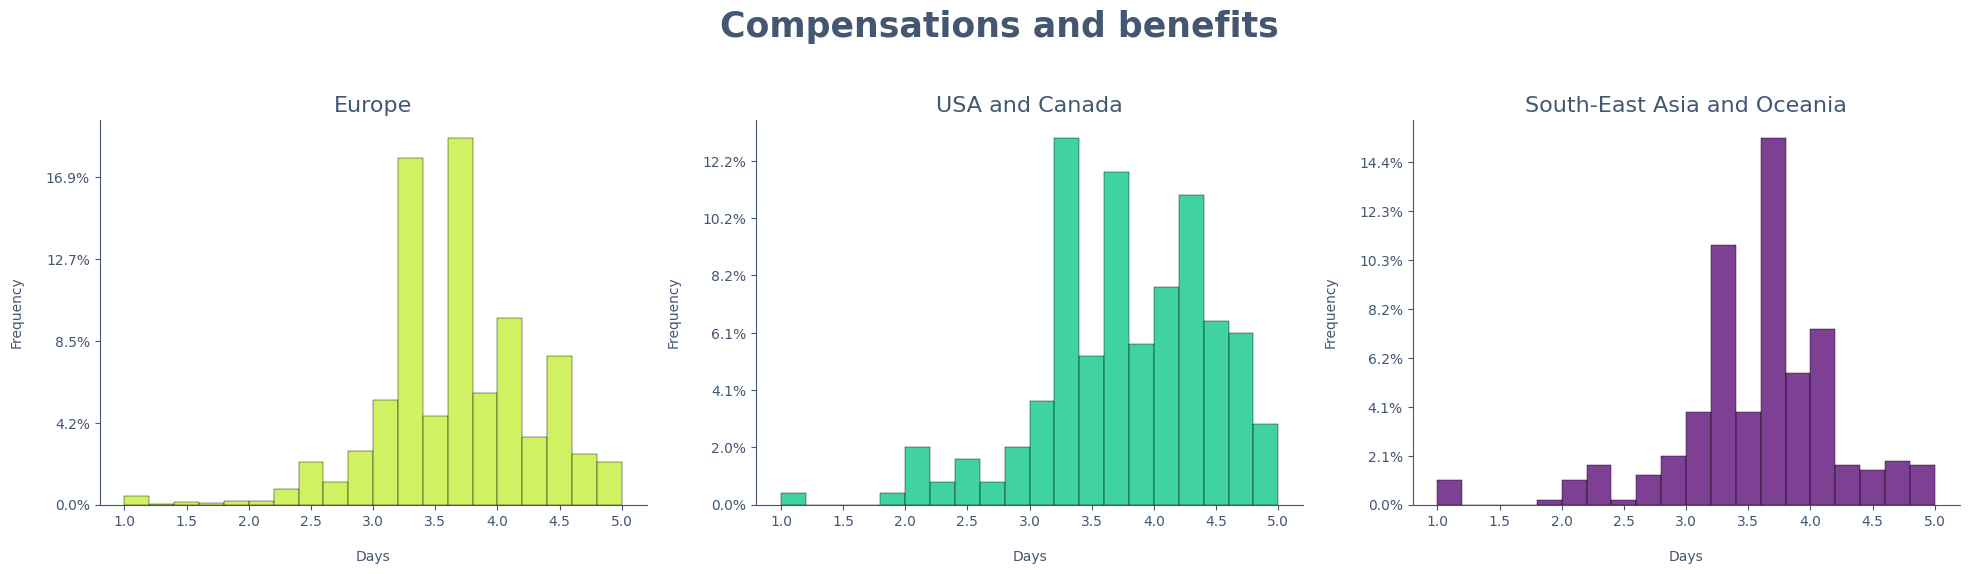

In [188]:
column = 'Comp_&_benefits'

combine_plots(
    "Compensations and benefits",
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

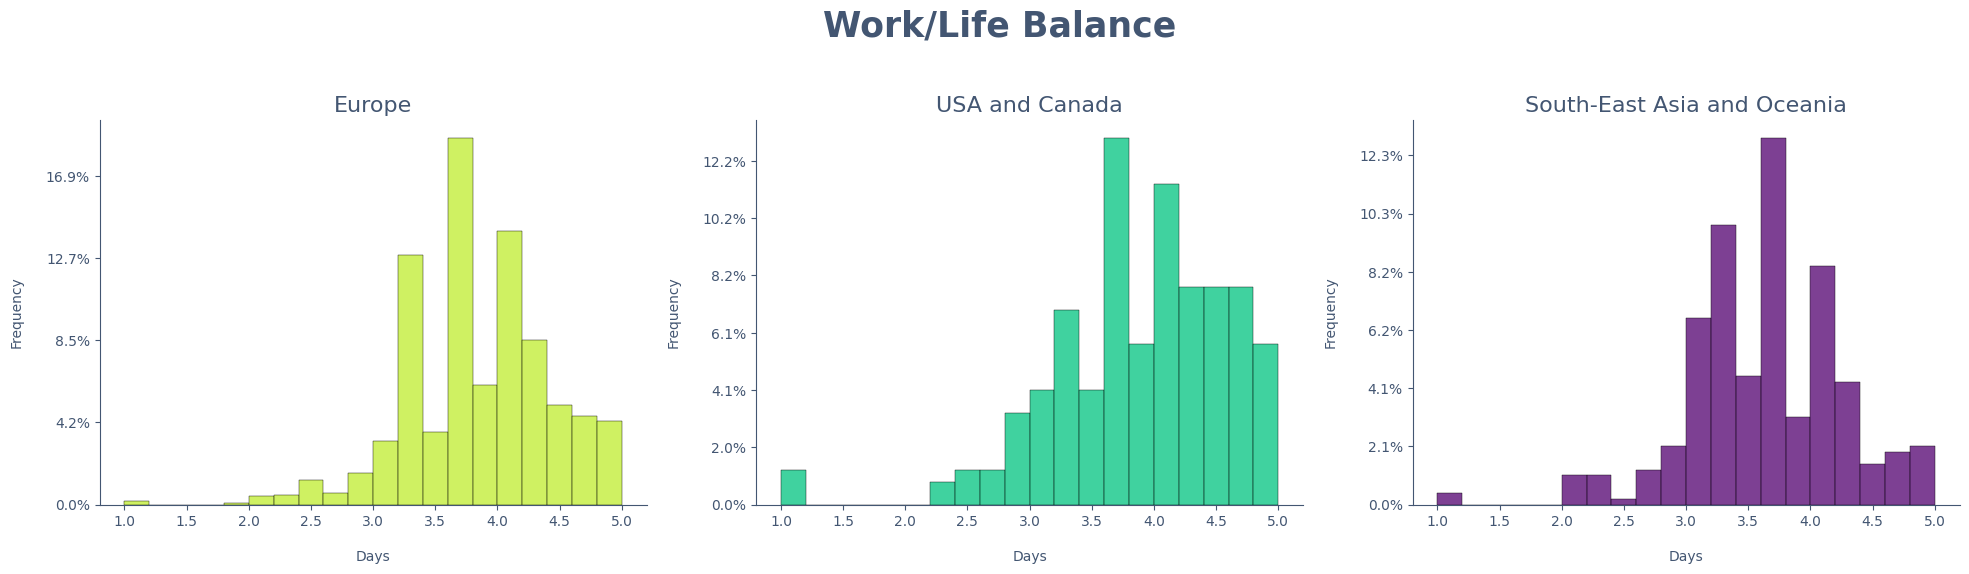

In [189]:
column = 'Work/Life_balance'

combine_plots(
    "Work/Life Balance",
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

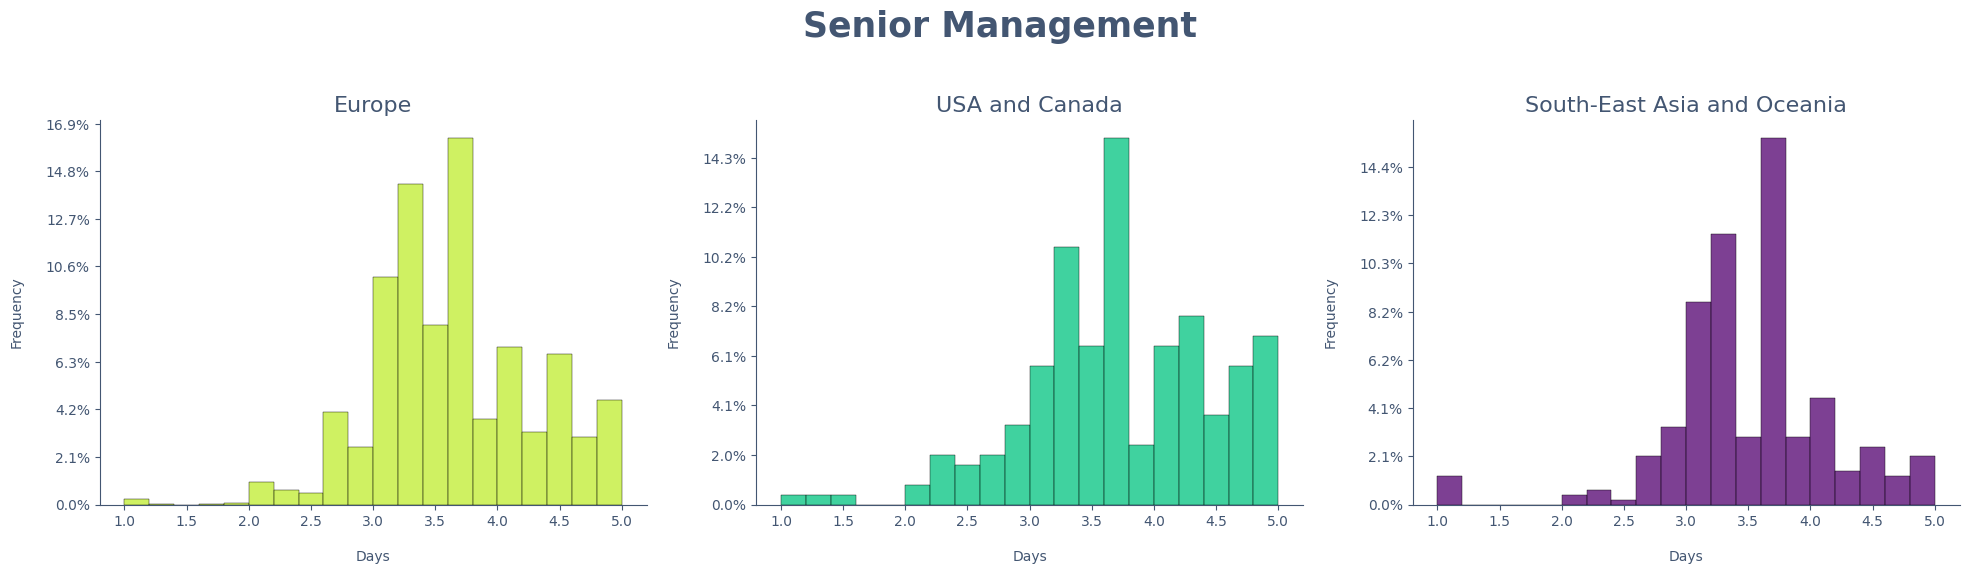

In [190]:
column = 'Senior_management'

combine_plots(
    "Senior Management",
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

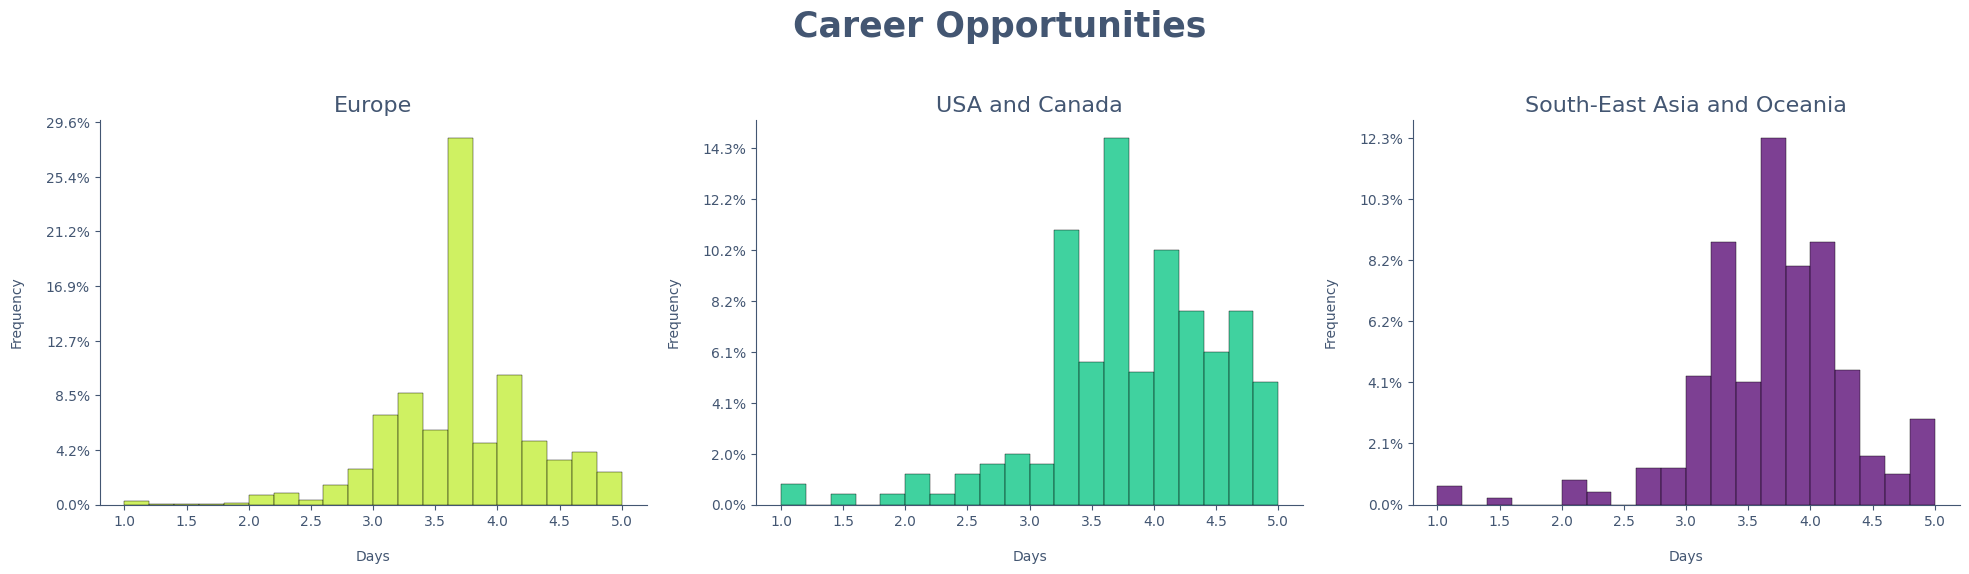

In [191]:
column = 'Career_opportunities'

combine_plots(
    "Career Opportunities",
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

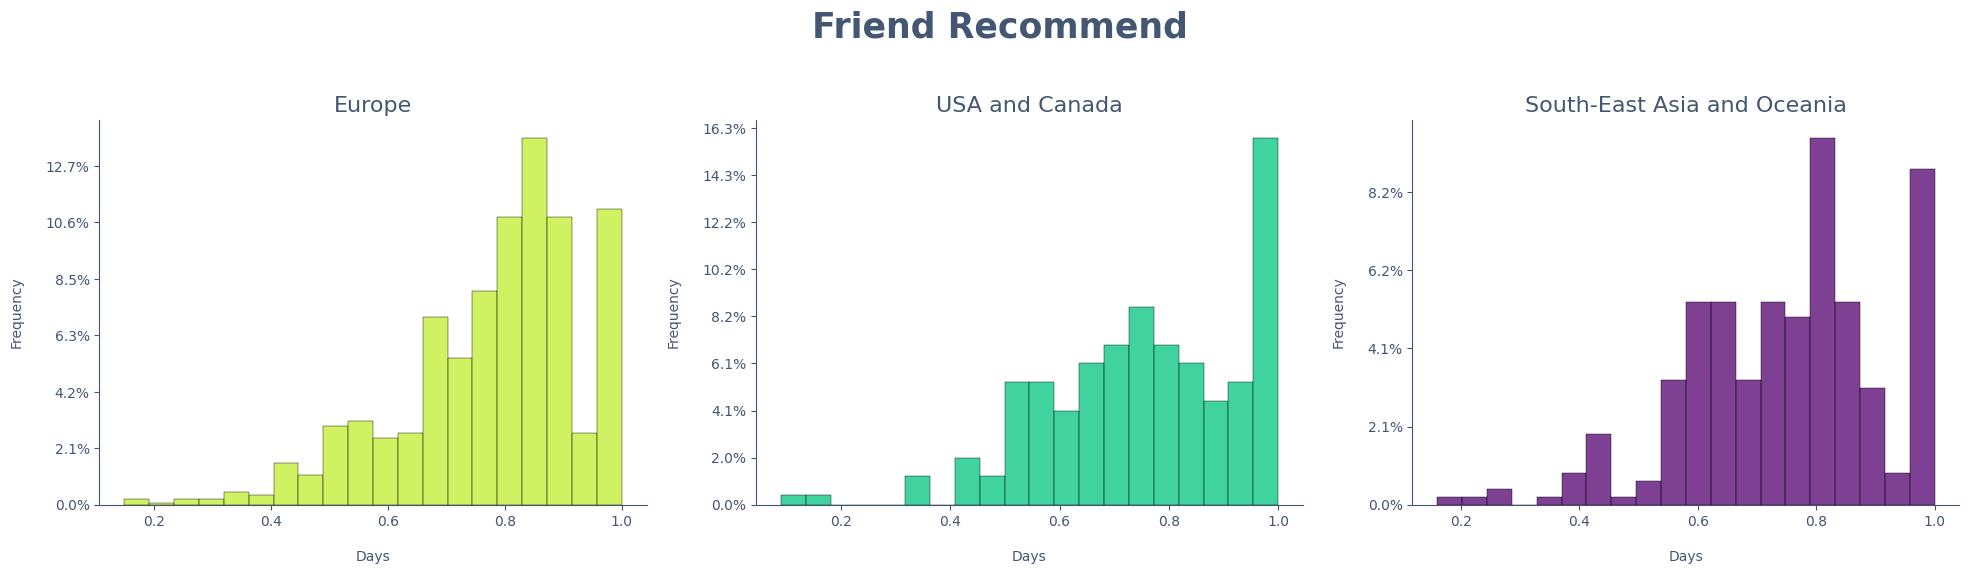

In [192]:
column = 'Friend_recommend'

combine_plots(
    "Friend Recommend",
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

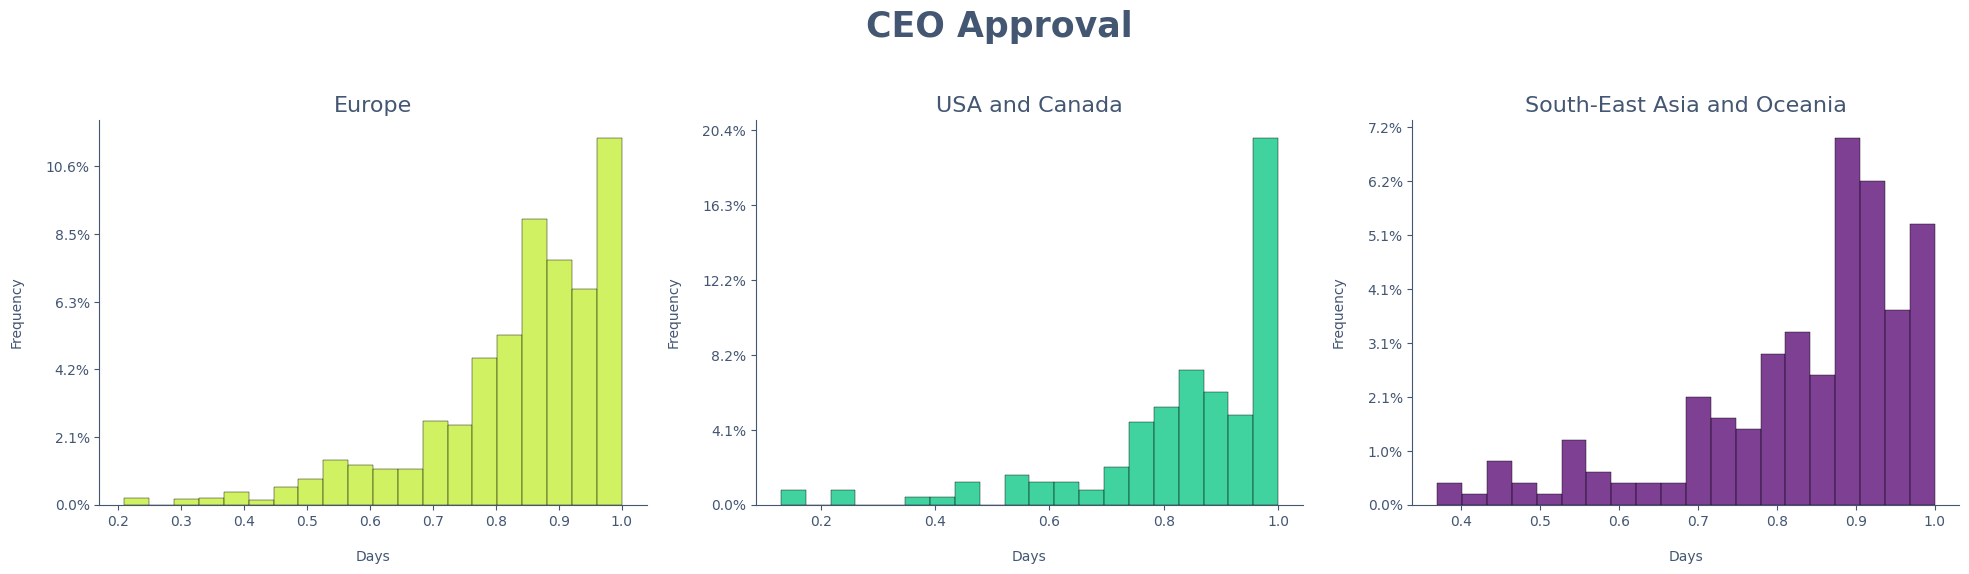

In [193]:
column = 'CEO_approval'

combine_plots(
    "CEO Approval",
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

Note: The ratings are roughly the same between the regions

### 7.2 Opinions

In [246]:
from wordcloud import WordCloud
import re
import nltk
import matplotlib.pyplot as plt
import pandas as pd

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def show_word_cloud(data: pd.DataFrame, positive_comments: bool = True):
    def get_the_input_string(comment: str):
        clean_string = re.sub(r'\[|\]', '', comment)
        pattern = r'\"(.*?)(?<!\\)\"'
        parsed_comment = ' '.join(re.findall(pattern, clean_string))
        return parsed_comment

    plot_data = data.dropna()
    plot_data = plot_data.apply(get_the_input_string)
    all_comments = ' '.join(plot_data.values.tolist())

    if positive_comments:
        palette = "crest"
        title = "Positive Comments:\n"
        title_color = "#00b91a"
    else:
        palette = "rocket"
        title = "Negative Comments:\n"
        title_color = "#ff0014"

    wordcloud = WordCloud(width=800, height=400, max_words=20, background_color='white', colormap=palette).generate(all_comments)

    with plt.style.context('seaborn'):
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=25, color=title_color, weight="bold")
        plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [263]:
def count_topics_in_comments(
            data: pd.DataFrame, 
            column: str,
            phrases_to_count: list[str | list[str]],
            title: str,
        ):

    def make_list_of_strings(comment: str):
        clean_string = re.sub(r'\[|\]', '', comment)
        pattern = r'\"(.*?)(?<!\\)\"'
        parsed_comments = re.findall(pattern, clean_string)
        return parsed_comments
    
    def get_list_of_comments(comments: pd.core.series.Series) -> str:

        comments_non_empty = comments.dropna()
        comments_lower = comments_non_empty.str.lower()
        comments_list = comments_lower.apply(lambda comment: make_list_of_strings(comment)).tolist()

        return comments_list
    
    def count_phrase(companies_comments: list[list[str]], phrase: list[str] | str):
        
        phrase_count = 0

        if isinstance(phrase, str):
            for one_company_comments in companies_comments:
                for comment in one_company_comments:
                    if phrase in comment:
                        phrase_count += 1
                        break

        elif isinstance(phrase, list):
            for one_company_comments in companies_comments:
                for comment in one_company_comments:
                    for subphrase in phrase:
                        if subphrase in comment:
                            phrase_count += 1
                            break

        else:
            raise TypeError(f"The phrase is of wrong type:\n{phrase}\n{type(phrase)}")

        return phrase_count

    
    def print_results( companies_comments: list[list[str]], phrases_to_count: list, num_companies: int, title: str):

        results = {}

        for phrase in phrases_to_count:

            phrase_count = count_phrase(companies_comments, phrase)

            if isinstance(phrase, list):

                phrase = ", ".join(phrase)

            results[phrase] = phrase_count


        sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))
        percent_results = {key: '{:,.2%}'.format(value / num_companies) for key, value in sorted_results.items()}

        print(title)
        print("-"*len(title))
        for result, counter in percent_results.items():
            print(f"{result}: {counter}")



    comments = data['Company_info'][column]

    comments_list = get_list_of_comments(comments)

    num_companies = len(data)

    print_results(comments_list, phrases_to_count, num_companies, title)


In [261]:

topics = [
        ["balance", "harmony", "equilibrium"],
        ["people", "colleagues", "folks", "team", "professionals", "personnel"],
        ["work", "responsibilities", "assignments", "tasks", "duties"], 
        ["management", "leadership", "managerial skills", "administration", "supervision"], 
        ["salary", "salaries", "compensation", "remuneration", "pay", "earnings"],
        ["perks", "benefit", "benefits"],
    ]

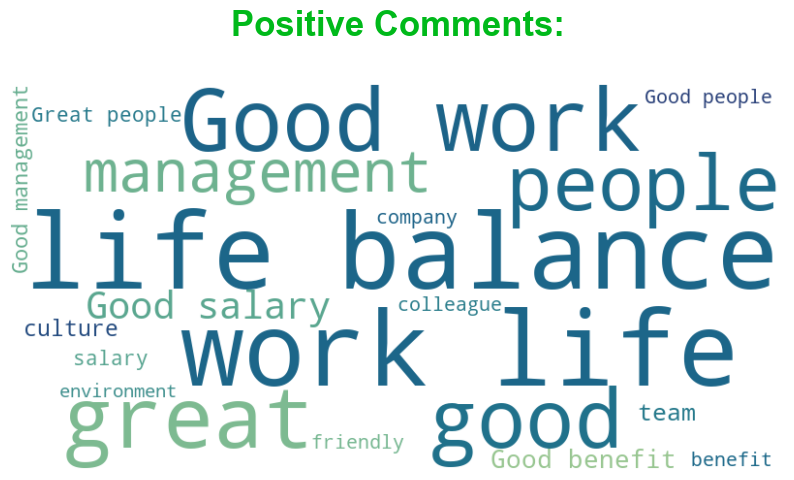

In [249]:
show_word_cloud(data['Company_info']['Pros'], True)

In [264]:
count_topics_in_comments(data, 'Pros', topics, "Positives counter:")

Positives counter:
------------------
people, colleagues, folks, team, professionals, personnel: 73.85%
work, responsibilities, assignments, tasks, duties: 72.56%
salary, salaries, compensation, remuneration, pay, earnings: 45.31%
perks, benefit, benefits: 37.94%
management, leadership, managerial skills, administration, supervision: 30.45%
balance, harmony, equilibrium: 28.86%


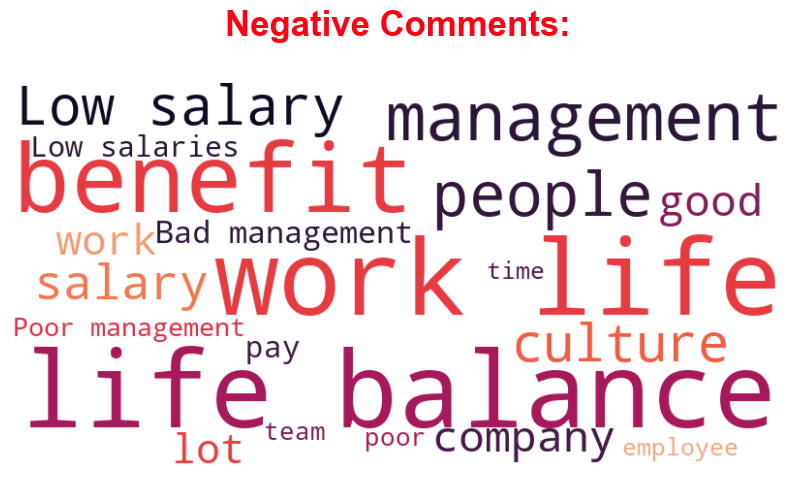

In [251]:
show_word_cloud(data['Company_info']['Cons'], False)

In [265]:
count_topics_in_comments(data, 'Cons', topics, "Negatives counter:")

Negatives counter:
------------------
salary, salaries, compensation, remuneration, pay, earnings: 48.32%
work, responsibilities, assignments, tasks, duties: 40.85%
management, leadership, managerial skills, administration, supervision: 34.94%
people, colleagues, folks, team, professionals, personnel: 27.31%
perks, benefit, benefits: 21.95%
balance, harmony, equilibrium: 20.56%


In [253]:
del topics, stop_words

## 8. Company Size

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

def show_distribution_ratings(ax, data: pd.DataFrame, region: str, title: str, column: str, color: str="#00c37f"):
    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )

        plot_data = data['Company_info'][column].str.replace(" ", "\n")
        plot_data = plot_data.tolist()  # Convert Series to list
        plot_data = sorted(plot_data, key=sort_values_manually)  # Sort the plot_data list

        return plot_data

    def sort_values_manually(value):
        # Define the desired order of values
        order = {
            "1\nto\n50": 1,
            "51\nto\n200": 2,
            "201\nto\n500": 3,
            "501\nto\n1000": 4,
            "1001\nto\n5000": 5,
            "5001\nto\n10000": 6,
            "10000+": 7
        }
        return order.get(value, float("inf"))

    plot_data = narrow_data(data, region)

    with plt.style.context('seaborn'):
        ax.set_title(title, size=16, color="#435672")
        sns.histplot(plot_data, ax=ax, color=color, line_kws={"edgecolor": "none"}, bins=20)
        ax.set_xlabel('\nDays', color="#435672")
        ax.set_ylabel('Frequency\n', color="#435672")
        ax.tick_params(colors="#435672")
        ax.spines['bottom'].set_color("#435672")
        ax.spines['left'].set_color("#435672")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(plot_data)))


In [255]:
def combine_plots(title: str, *args):
    num_plots = len(args)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 5))

    suptitle = fig.suptitle(title, size=25, color="#435672", weight="semibold")
    suptitle.set_y(1.10)  # Adjust the vertical position to add margin

    for i, (plot_args, color, column) in enumerate(args):
        ax = axes[i]
        show_distribution_ratings(ax, *plot_args, color=color, column=column)

    plt.show()

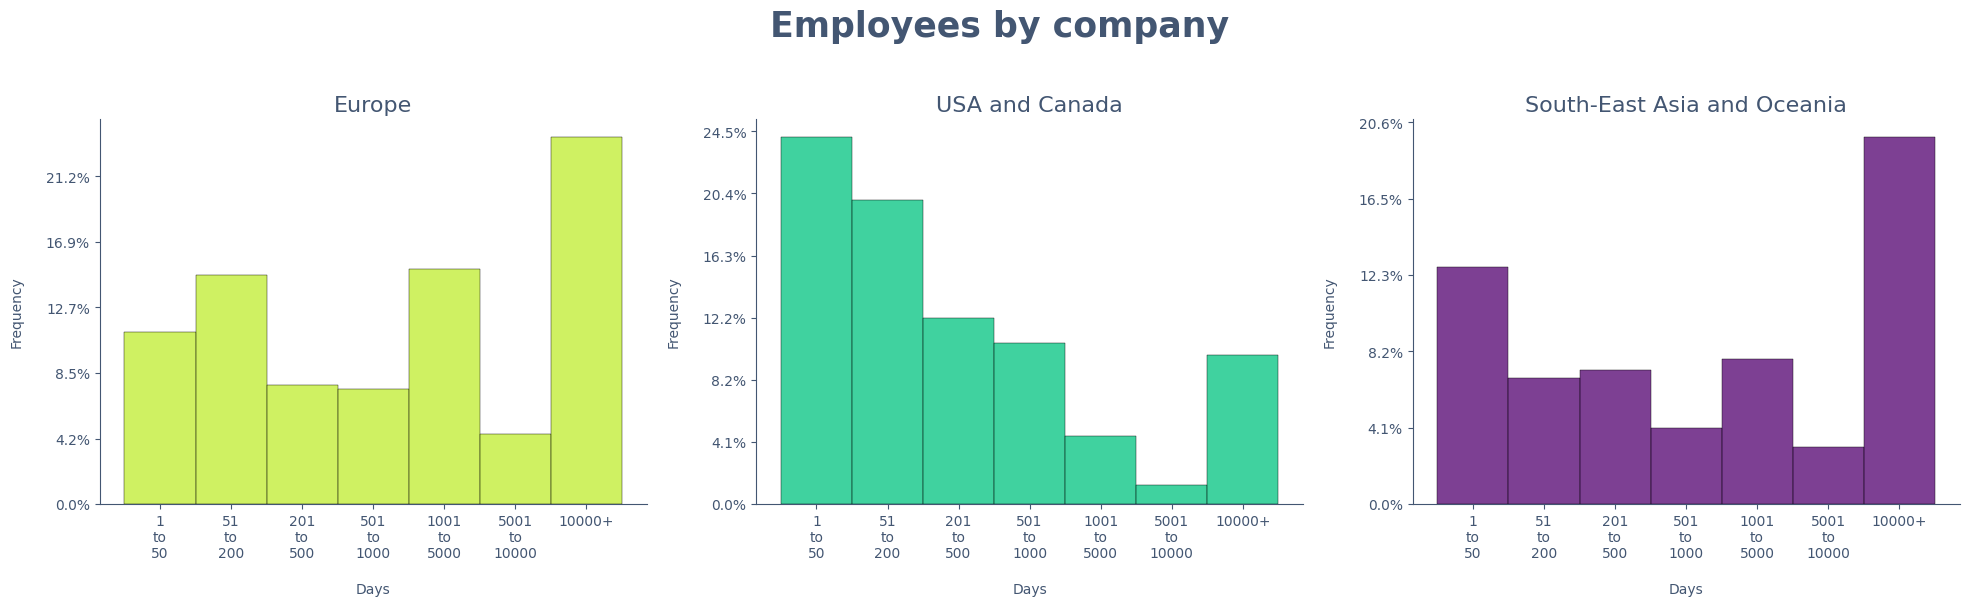

In [256]:
column = 'Employees'

combine_plots(
    "Employees by company",
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

## 9. Company Ages

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

def show_distribution_ratings(ax, data: pd.DataFrame, region: str, title: str, column: str, color: str="#00c37f"):
    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )

        plot_data = data['Company_info'][column].str.replace(" ", "\n")
        plot_data = plot_data.tolist()  # Convert Series to list

        return plot_data

    plot_data = narrow_data(data, region)

    with plt.style.context('seaborn'):
        ax.set_title(title, size=16, color="#435672")
        sns.histplot(plot_data, ax=ax, color=color, line_kws={"edgecolor": "none"}, bins=20)
        ax.set_xlabel('\nDays', color="#435672")
        ax.set_ylabel('Frequency\n', color="#435672")
        ax.tick_params(colors="#435672")
        ax.spines['bottom'].set_color("#435672")
        ax.spines['left'].set_color("#435672")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(plot_data)))


In [269]:
column = 'Company_age'

combine_plots(
    "Companies' Age",
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

AttributeError: Can only use .str accessor with string values!